# 206061L Rasandie Kristhogu

## Iranian Telecommunication Customer Churn Data

### **Student Details:**
**Student_ID Student_Name**

206061L Rasandie Kristhogu

---

# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Loading Data

In [2]:
import os
os.listdir('/content')

['.config', 'Customer Churn.csv', 'sample_data']

In [3]:
churn_data = pd.read_csv('/content/Customer Churn.csv')
churn_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


# Initial Data Inspection

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
churn_data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [6]:
churn_data.shape

(3150, 14)

# Data Cleaning

In [7]:
# Check Data Types
churn_data.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [8]:
# Check Null Values
churn_data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

**It seems that the Iranian Telecom Company Churn dataset doesn't have any missing dataset. So no imputation is necessary.**

In [9]:
# Find the age range for respective age group
age_range_for_age_group = churn_data.groupby('Age Group')['Age'].agg(['min','max']).reset_index()
age_range_for_age_group.columns = ['Age Group Name', 'Minimum Age', 'Maximum Age']
age_range_for_age_group

,Age Group Name,Minimum Age,Maximum Age
0,1,15,15
1,2,25,25
2,3,30,30
3,4,45,45
4,5,55,55


**Accordingly, the age group & age variables are similar in nature therefore, provides us the option of dropping the age variable**

In [10]:
churn_data.drop('Age', axis=1, inplace=True)

In [11]:
churn_data.shape

(3150, 13)

# Exploratory Data Analysis

In [12]:
# Summary Statistics of this Dataset
churn_data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,2165.280000,1.000000


# Visualizing The Distribution Of The Data

### Call Failure Distribution

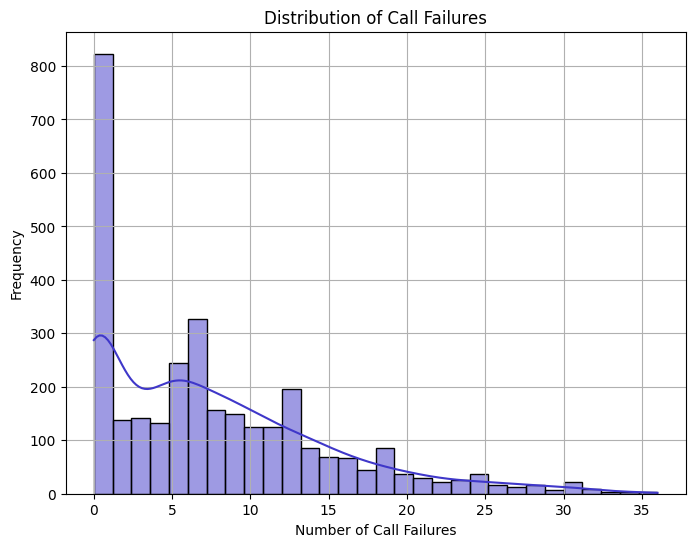

In [13]:
# Visualizing the Call Failure Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Call  Failure'], bins=30, kde=True, color='#3F37C9')
plt.title('Distribution of Call Failures')
plt.xlabel('Number of Call Failures')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Subscription Length Distribution

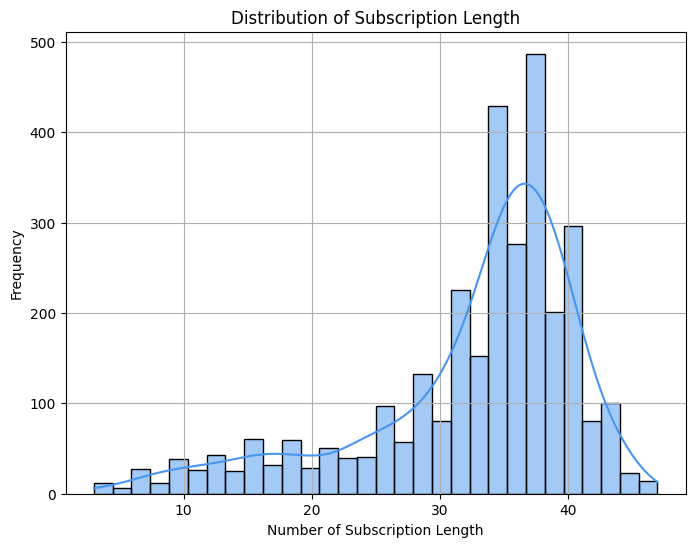

In [14]:
# Visualizing the Subscription  Length Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Subscription  Length'], bins=30, kde=True, color='#4895EF')
plt.title('Distribution of Subscription Length')
plt.xlabel('Number of Subscription Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Seconds of Use Distribution

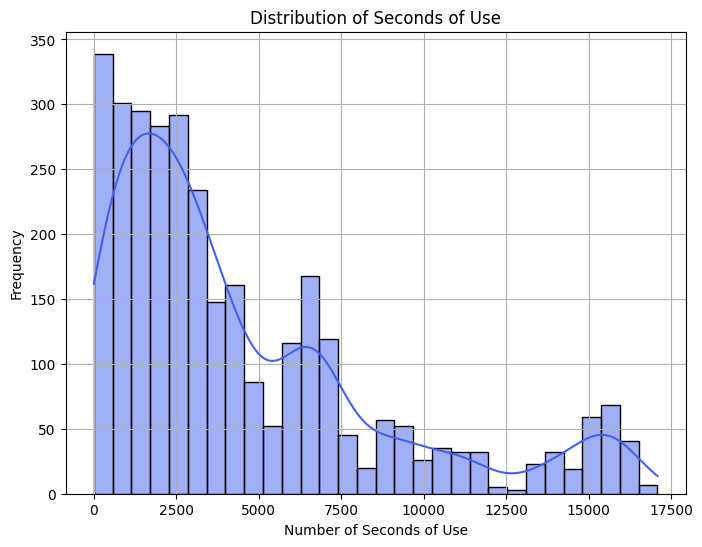

In [15]:
# Visualizing the Seconds of Use Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Seconds of Use'], bins=30, kde=True, color='#4361EE')
plt.title('Distribution of Seconds of Use')
plt.xlabel('Number of Seconds of Use')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Frequency of Use Distribution

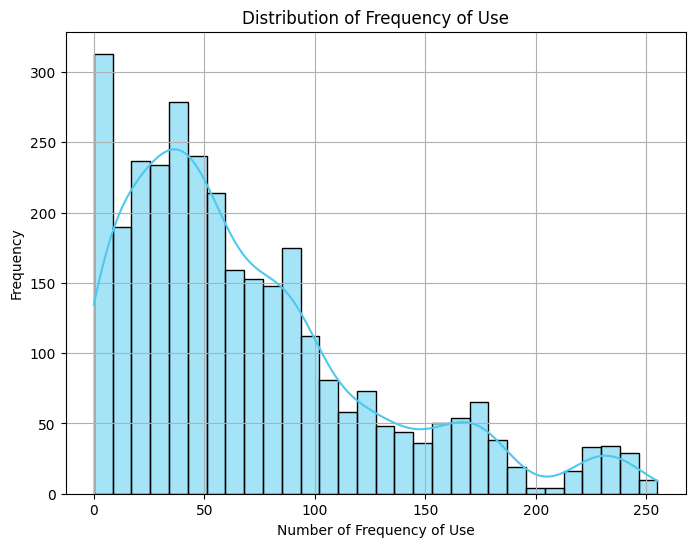

In [16]:
# Visualizing the Frequency of Use Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Frequency of use'], bins=30, kde=True, color='#4CC9F0')
plt.title('Distribution of Frequency of Use')
plt.xlabel('Number of Frequency of Use')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Frequency of SMS Distribution

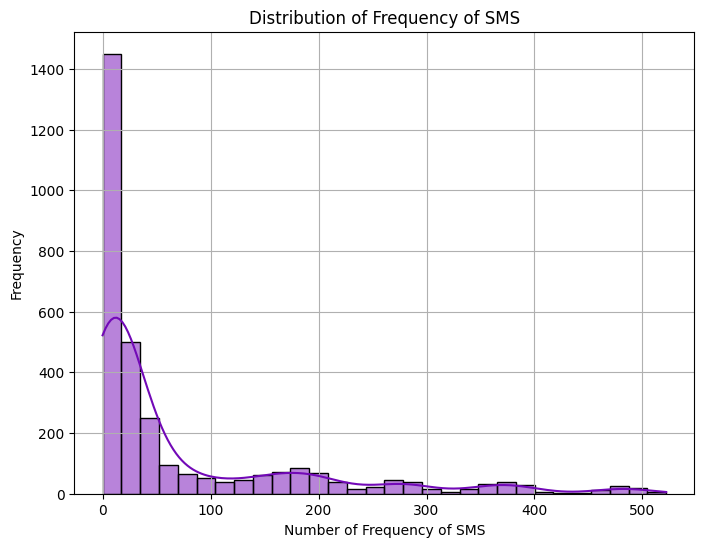

In [17]:
# Visualizing the Frequency of SMS Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Frequency of SMS'], bins=30, kde=True, color='#7209B7')
plt.title('Distribution of Frequency of SMS')
plt.xlabel('Number of Frequency of SMS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distinct Called Numbers Distribution

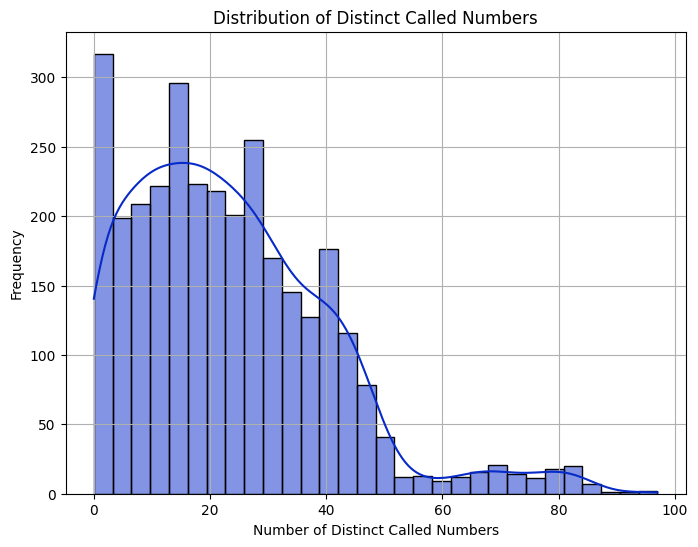

In [18]:
# Visualizing the Distinct Called Numbers Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Distinct Called Numbers'], bins=30, kde=True, color='#072ac8')
plt.title('Distribution of Distinct Called Numbers')
plt.xlabel('Number of Distinct Called Numbers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Customer Value Distribution

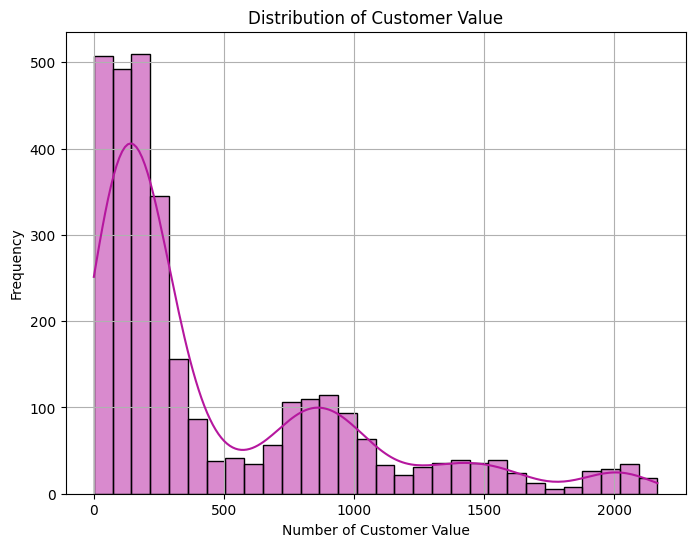

In [19]:
# Visualizing the Customer Value Distribution
plt.figure(figsize=(8,6))
sns.histplot(churn_data['Customer Value'], bins=30, kde=True, color='#B5179E')
plt.title('Distribution of Customer Value')
plt.xlabel('Number of Customer Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Complaints Distribution

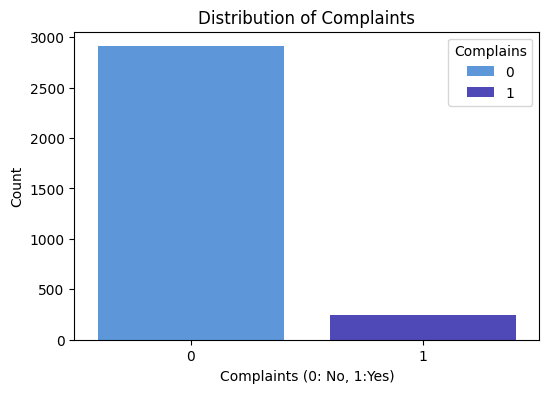

In [20]:
# Visualize the complaints Distribution

no_complaint_color = '#4895EF'
complaint_color = '#3F37C9'

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Complains', data=churn_data, hue='Complains', palette=[no_complaint_color, complaint_color])
plt.title('Distribution of Complaints')
plt.xlabel('Complaints (0: No, 1:Yes)')
plt.ylabel('Count')
plt.show()

### Charge Amount Distribution

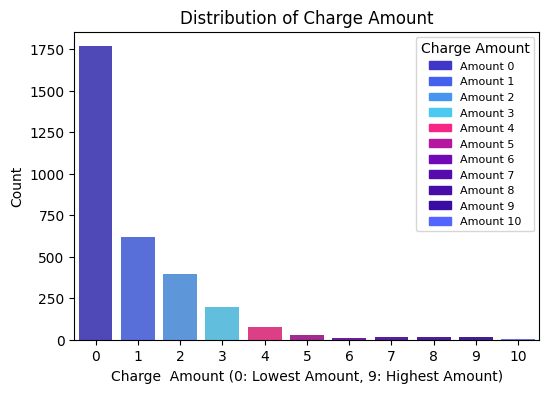

In [21]:
# Visualize the Charge Amount Distribution

colors = ['#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#5465FF']

palette=colors
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Charge  Amount', data=churn_data, hue='Charge  Amount', palette=palette)
plt.title('Distribution of Charge Amount')
plt.xlabel('Charge  Amount (0: Lowest Amount, 9: Highest Amount)')
plt.ylabel('Count')
legendLabels = [f'Amount {i}' for i in range(len(colors))]
legendColors = [mpatches.Patch(color=color) for color in palette]
plt.legend(legendColors, legendLabels, title='Charge Amount', loc='upper right', fontsize='8', title_fontsize='10')
plt.show()

### Age Group Distribution

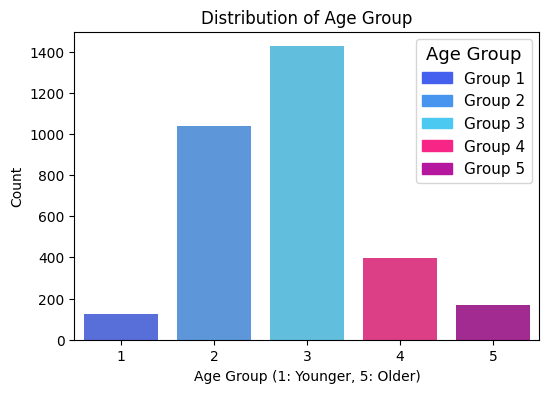

In [22]:
# Visualize the Age Group Distribution

colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E']

palette=colors
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Age Group', data=churn_data, hue='Age Group', palette=palette)
plt.title('Distribution of Age Group')
plt.xlabel('Age Group (1: Younger, 5: Older)')
plt.ylabel('Count')
legendLabels = [f'Group {i+1}' for i in range(len(colors))]
legendColors = [mpatches.Patch(color=color) for color in palette]
plt.legend(legendColors, legendLabels, title='Age Group', loc='upper right', fontsize='11', title_fontsize='13')
plt.show()

### Tariff Plan Distribution

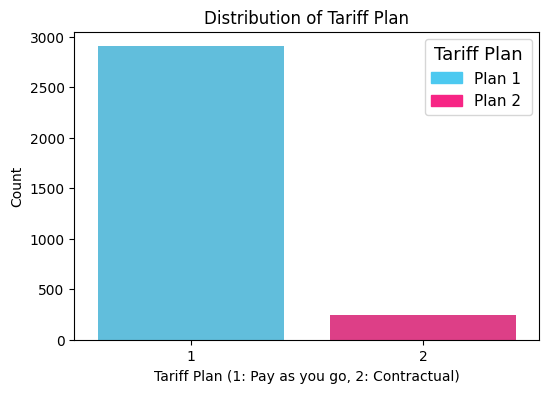

In [23]:
# Visualize the Tariff Plan Distribution

colors = ['#4CC9F0', '#F72585']

palette=colors
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Tariff Plan', data=churn_data, hue='Tariff Plan', palette=palette)
plt.title('Distribution of Tariff Plan')
plt.xlabel('Tariff Plan (1: Pay as you go, 2: Contractual)')
plt.ylabel('Count')
legendLabels = [f'Plan {i+1} ' for i in range(len(colors))]
legendColors = [mpatches.Patch(color=color) for color in palette]
plt.legend(legendColors, legendLabels, title='Tariff Plan', loc='upper right', fontsize='11', title_fontsize='13')
plt.show()

### Status Distribution

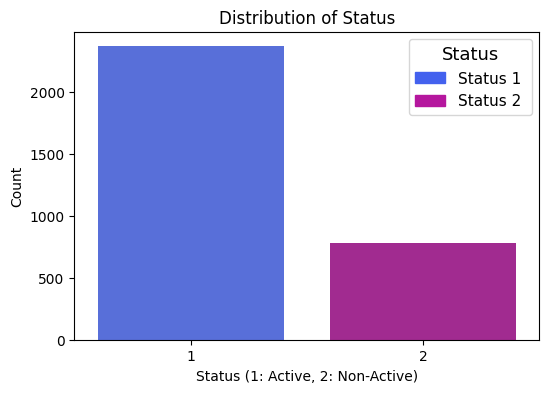

In [24]:
# Visualize the Status Distribution

colors = ['#4361EE', '#B5179E']

palette=colors
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Status', data=churn_data, hue='Status', palette=palette)
plt.title('Distribution of Status')
plt.xlabel('Status (1: Active, 2: Non-Active)')
plt.ylabel('Count')
legendLabels = [f'Status {i+1} ' for i in range(len(colors))]
legendColors = [mpatches.Patch(color=color) for color in palette]
plt.legend(legendColors, legendLabels, title='Status', loc='upper right', fontsize='11', title_fontsize='13')
plt.show()

### Churn Distribution

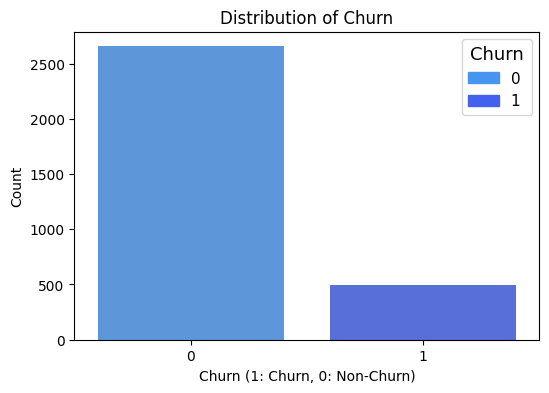

In [25]:
# Visualize the Churn Distribution

colors = ['#4895EF', '#4361EE']

palette=colors
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=churn_data, hue='Churn', palette=palette)
plt.title('Distribution of Churn')
plt.xlabel('Churn (1: Churn, 0: Non-Churn)')
plt.ylabel('Count')
legendLabels = [f'{i} ' for i in range(len(colors))]
legendColors = [mpatches.Patch(color=color) for color in palette]
plt.legend(legendColors, legendLabels, title='Churn', loc='upper right', fontsize='11', title_fontsize='13')
plt.show()


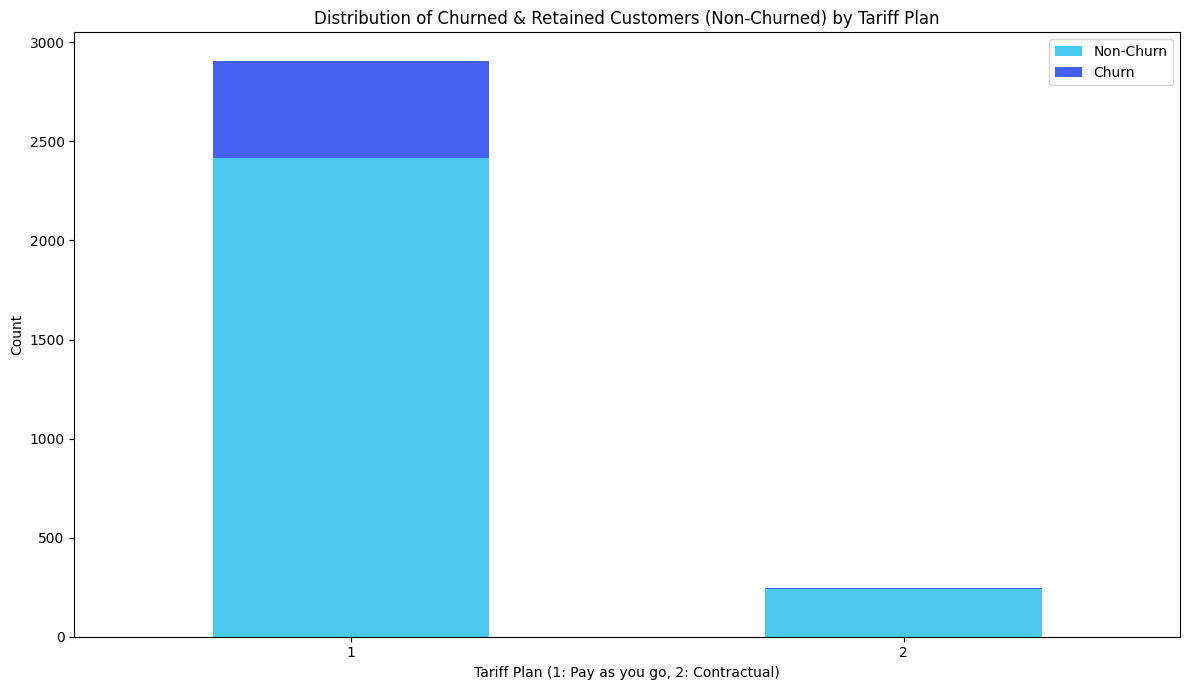

In [26]:
# Distribution of customer churn by tariff plan of customers

churn_data['Churn']= churn_data['Churn'].astype(int)
churn_count = churn_data.groupby(['Tariff Plan', 'Churn']).size().unstack(fill_value=0)
churn_count.columns = ['Non-Churn', 'Churn']

fig, ax = plt.subplots(figsize=(12,7))
churn_count.plot(kind='bar', stacked=True, color=['#4CC9F0','#4361EE'], ax=ax)
ax.set_xlabel('Tariff Plan (1: Pay as you go, 2: Contractual)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Churned & Retained Customers (Non-Churned) by Tariff Plan')
ax.legend(['Non-Churn','Churn'], loc='upper right')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

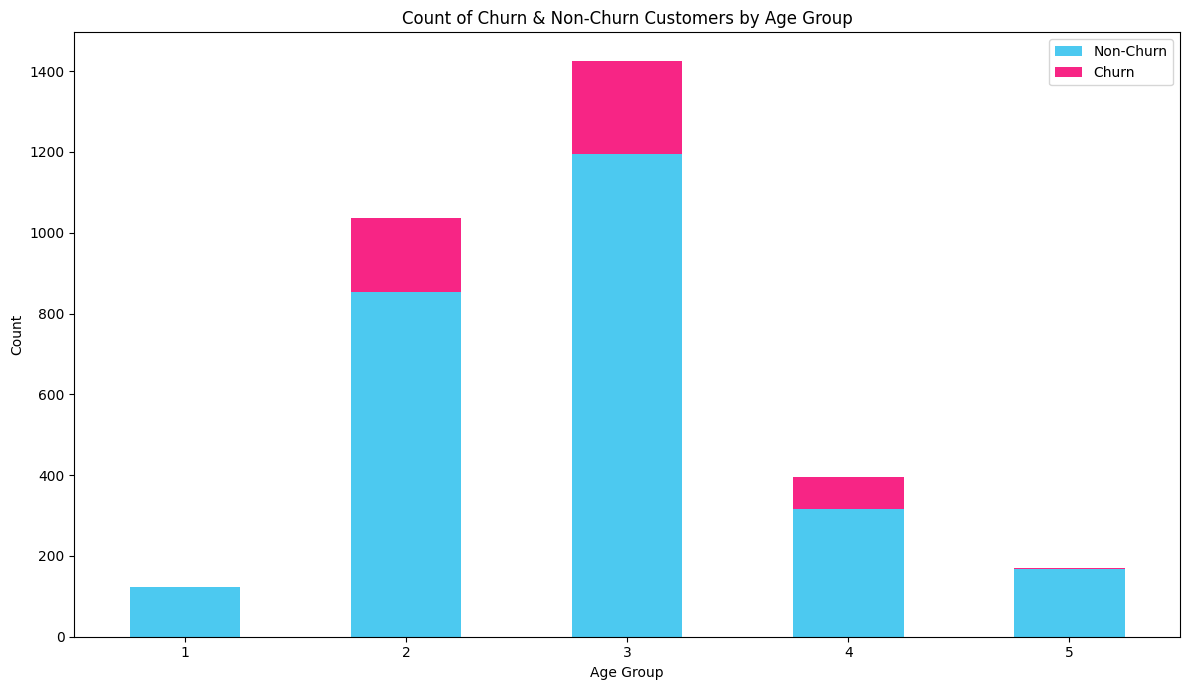

In [27]:
# Distribution of customer churn by age group of customers

churn_count = churn_data.groupby(['Age Group', 'Churn']).size().unstack(fill_value=0)
churn_count.columns = ['Non-Churn', 'Churn']

fig, ax = plt.subplots(figsize=(12,7))
churn_count.plot(kind='bar', stacked=True, color=['#4CC9F0','#F72585'], ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Count of Churn & Non-Churn Customers by Age Group')
ax.legend(['Non-Churn','Churn'], loc='upper right')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

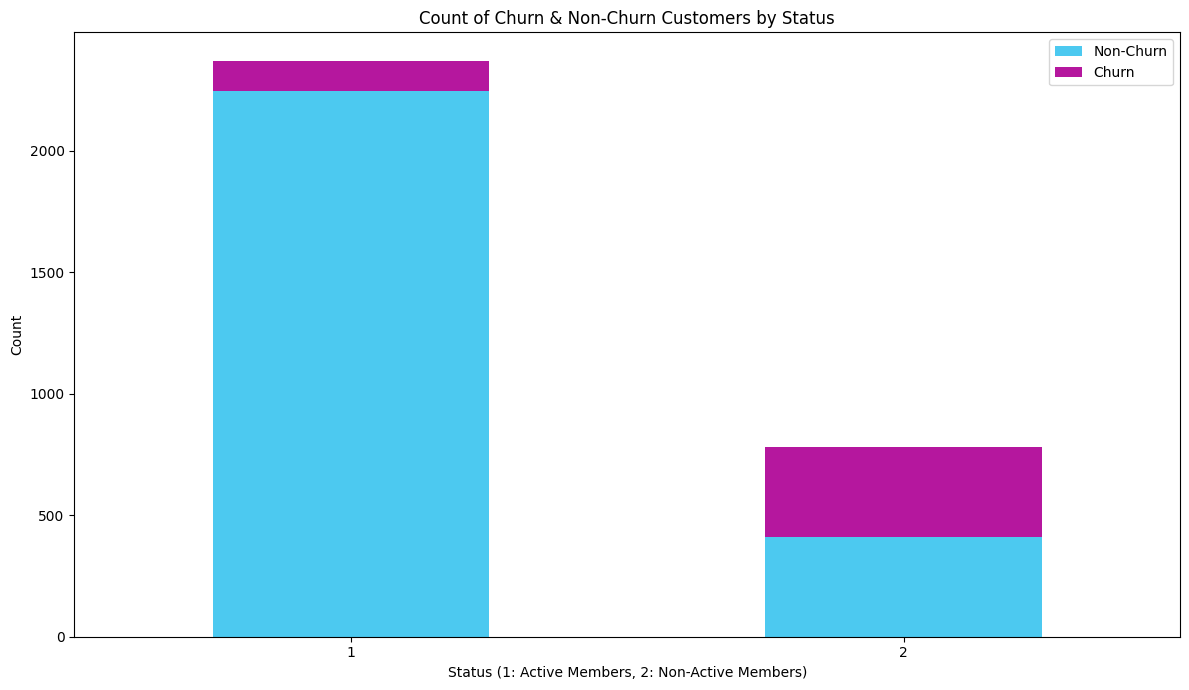

In [28]:
# Distribution of customer churn by status of customers

churn_count = churn_data.groupby(['Status', 'Churn']).size().unstack(fill_value=0)
churn_count.columns = ['Non-Churn', 'Churn']

fig, ax = plt.subplots(figsize=(12,7))
churn_count.plot(kind='bar', stacked=True, color=['#4CC9F0','#B5179E'], ax=ax)
ax.set_xlabel('Status (1: Active Members, 2: Non-Active Members)')
ax.set_ylabel('Count')
ax.set_title('Count of Churn & Non-Churn Customers by Status')
ax.legend(['Non-Churn','Churn'], loc='upper right')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [29]:
numerical_cols=['Call  Failure','Subscription  Length','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Customer Value']

# Transforming to Ensure Normal Distribution

In [30]:
skewness=churn_data[numerical_cols].skew()
skewness

Call  Failure              1.089752
Subscription  Length      -1.300015
Seconds of Use             1.321943
Frequency of use           1.144166
Frequency of SMS           1.974142
Distinct Called Numbers    1.029402
Customer Value             1.427292
dtype: float64

In [31]:
# Normalizing using Square Root Transformation
churn_data['Call_Failure']=np.sqrt(churn_data['Call  Failure'])
churn_data['Seconds_of_Use']=np.sqrt(churn_data['Seconds of Use'])
churn_data['Frequency_of_Use']=np.sqrt(churn_data['Frequency of use'])
churn_data['Frequency_of_SMS']=np.sqrt(churn_data['Frequency of SMS'])
churn_data['Distinct_Called_Numbers']=np.sqrt(churn_data['Distinct Called Numbers'])
churn_data['Customer_Value']=np.sqrt(churn_data['Customer Value'])

In [32]:
# Normalizing using BoxCox Transformation
churn_data['Subscription_Length'], _= boxcox(churn_data['Subscription  Length'])

In [33]:
# Create another dataframe with the transformed variables and the categorical variables
columns = ['Call_Failure', 'Complains', 'Subscription_Length', 'Charge  Amount', 'Seconds_of_Use','Frequency_of_Use','Frequency_of_SMS','Distinct_Called_Numbers','Age Group','Tariff Plan','Status','Customer_Value', 'Churn']

data = churn_data[columns]
data.head()

,Call_Failure,Complains,Subscription_Length,Charge Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_SMS,Distinct_Called_Numbers,Age Group,Tariff Plan,Status,Customer_Value,Churn
0,2.828427,0,3071.552143,0,66.105976,8.426150,2.236068,4.123106,3,1,1,14.058449,0
1,0.000000,0,3273.776898,0,17.832555,2.236068,2.645751,2.000000,2,1,2,6.784910,0
2,3.162278,0,2876.921044,0,49.527770,7.745967,18.947295,4.898979,3,1,1,39.198469,0
3,3.162278,0,3071.552143,0,64.791975,8.124038,1.000000,5.916080,1,1,1,15.492579,0
4,1.732051,0,3071.552143,0,48.918299,7.615773,1.414214,5.744563,1,1,1,12.074974,0


# Recheck the Distribution

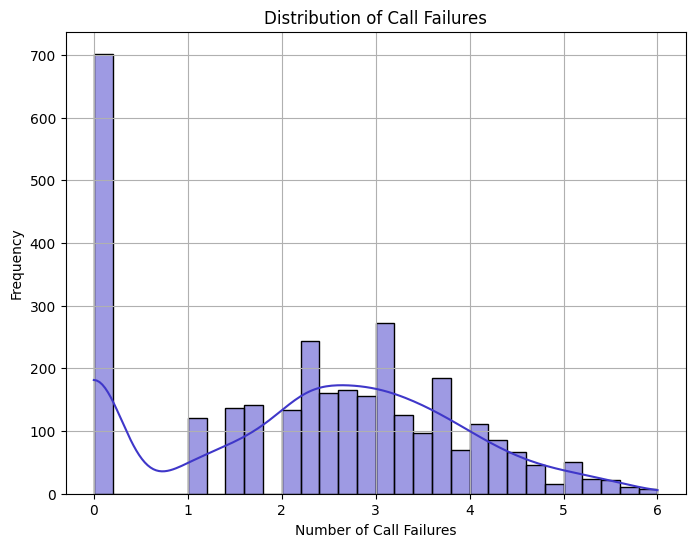

In [34]:
# Visualizing the Call Failure Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Call_Failure'], bins=30, kde=True, color='#3F37C9')
plt.title('Distribution of Call Failures')
plt.xlabel('Number of Call Failures')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

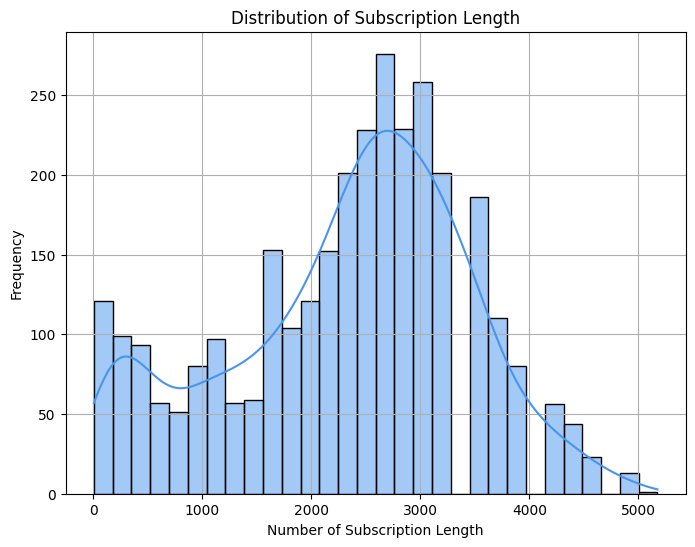

In [35]:
# Visualizing the Subscription  Length Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Subscription_Length'], bins=30, kde=True, color='#4895EF')
plt.title('Distribution of Subscription Length')
plt.xlabel('Number of Subscription Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

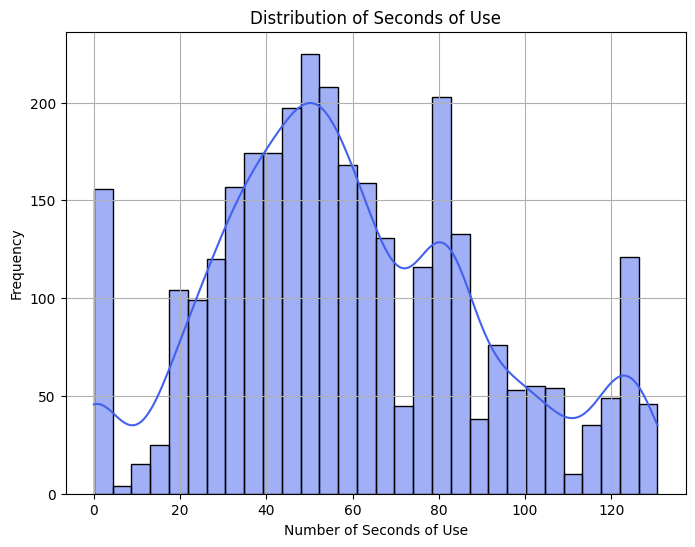

In [36]:
# Visualizing the Seconds of Use Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Seconds_of_Use'], bins=30, kde=True, color='#4361EE')
plt.title('Distribution of Seconds of Use')
plt.xlabel('Number of Seconds of Use')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

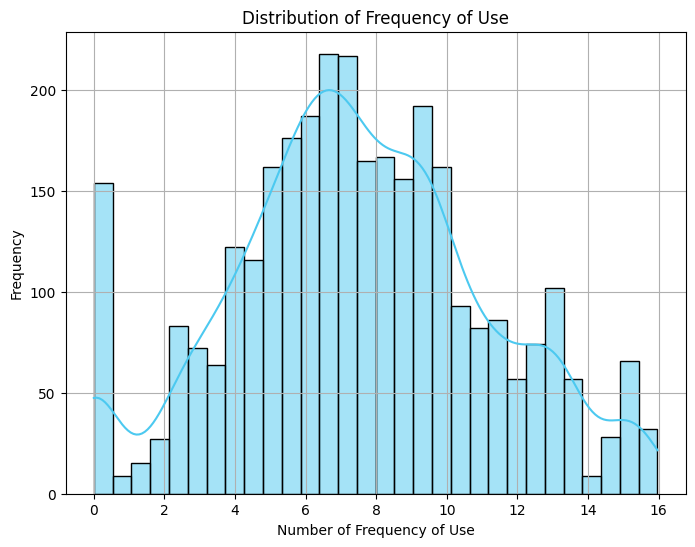

In [37]:
# Visualizing the Frequency of Use Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Frequency_of_Use'], bins=30, kde=True, color='#4CC9F0')
plt.title('Distribution of Frequency of Use')
plt.xlabel('Number of Frequency of Use')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

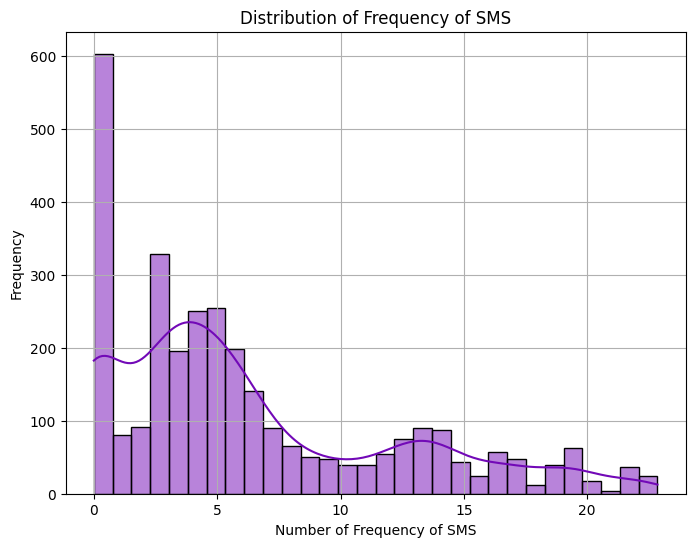

In [38]:
# Visualizing the Frequency of SMS Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Frequency_of_SMS'], bins=30, kde=True, color='#7209B7')
plt.title('Distribution of Frequency of SMS')
plt.xlabel('Number of Frequency of SMS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

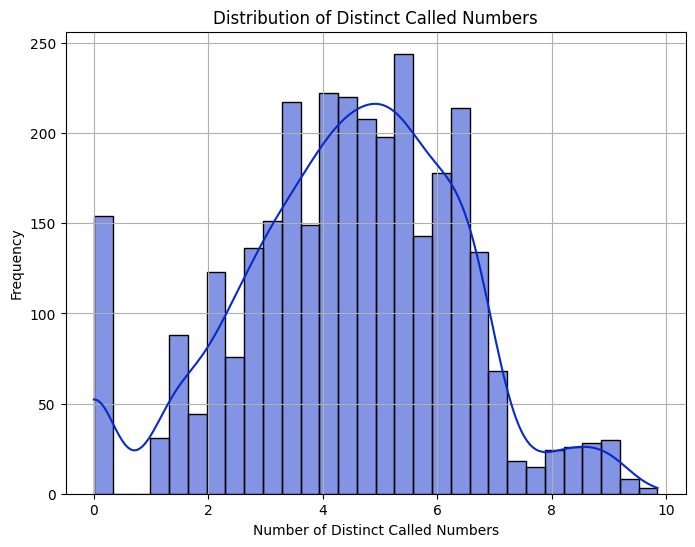

In [39]:
# Visualizing the Distinct Called Numbers Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Distinct_Called_Numbers'], bins=30, kde=True, color='#072ac8')
plt.title('Distribution of Distinct Called Numbers')
plt.xlabel('Number of Distinct Called Numbers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

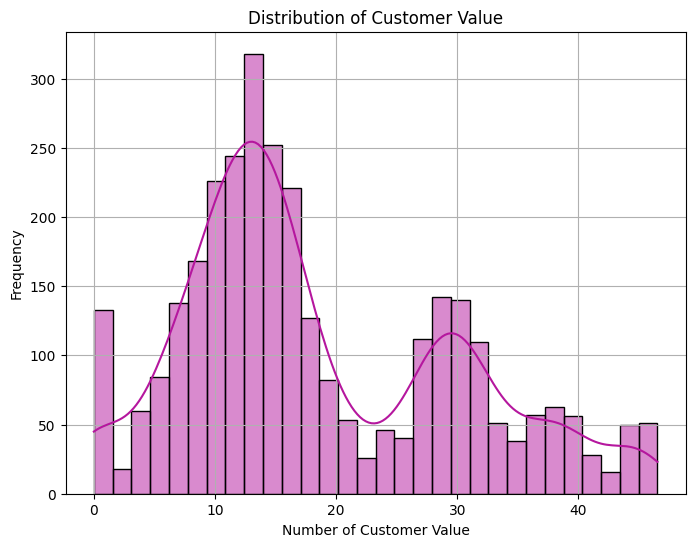

In [40]:
# Visualizing the Customer Value Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Customer_Value'], bins=30, kde=True, color='#B5179E')
plt.title('Distribution of Customer Value')
plt.xlabel('Number of Customer Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
data.head()

,Call_Failure,Complains,Subscription_Length,Charge Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_SMS,Distinct_Called_Numbers,Age Group,Tariff Plan,Status,Customer_Value,Churn
0,2.828427,0,3071.552143,0,66.105976,8.426150,2.236068,4.123106,3,1,1,14.058449,0
1,0.000000,0,3273.776898,0,17.832555,2.236068,2.645751,2.000000,2,1,2,6.784910,0
2,3.162278,0,2876.921044,0,49.527770,7.745967,18.947295,4.898979,3,1,1,39.198469,0
3,3.162278,0,3071.552143,0,64.791975,8.124038,1.000000,5.916080,1,1,1,15.492579,0
4,1.732051,0,3071.552143,0,48.918299,7.615773,1.414214,5.744563,1,1,1,12.074974,0


# Class Imbalance

In [42]:
# Class Imbalance
class_imbalance= data['Churn']
# Check class imbalance
print(class_imbalance.value_counts())

Churn
0    2655
1     495
Name: count, dtype: int64


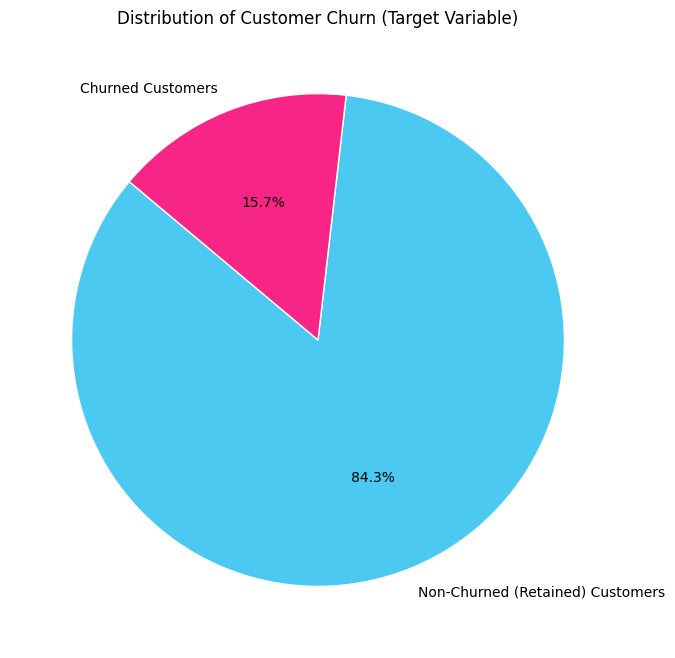

In [43]:
# Visualize the class imbalance
labels = ['Non-Churned (Retained) Customers','Churned Customers']
sizes = [2655, 495]
colors = ['#4CC9F0','#F72585']

plt.figure(figsize=(8,8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',startangle=140, wedgeprops={'edgecolor':'white'})
plt.title('Distribution of Customer Churn (Target Variable)')

plt.show()

# Correlation Matrix

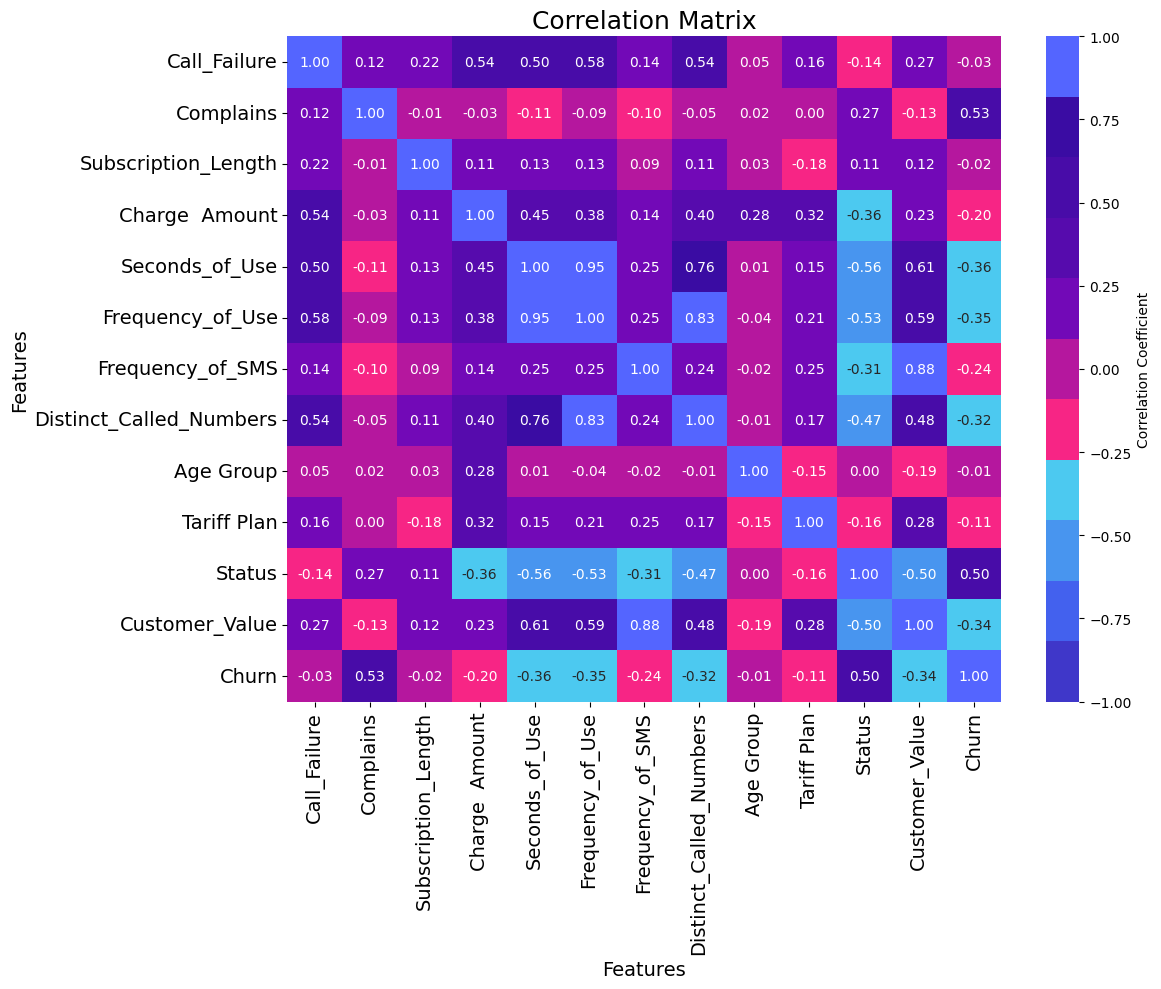

In [44]:
colors = ['#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#5465FF']
cmap = mcolors.ListedColormap(colors)
norm=mcolors.Normalize(vmin=-1, vmax=1) # Normalizing the color range
correlation_matrix = data.corr()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, cmap=cmap, norm=norm, annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.tight_layout()
plt.show()

In [45]:
# Check VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif_data

,Feature,VIF
0,Call_Failure,8.493048
1,Complains,1.558475
2,Subscription_Length,6.573221
3,Charge Amount,3.584079
4,Seconds_of_Use,108.973240
5,Frequency_of_Use,114.542982
6,Frequency_of_SMS,37.755906
7,Distinct_Called_Numbers,20.255582
8,Age Group,14.941020
9,Tariff Plan,19.267919


In [46]:
# Create a new variable called Overall Usage
data.loc[:, 'Overall_Usage'] = data.loc[:, 'Seconds_of_Use']+data.loc[:, 'Frequency_of_Use']+data.loc[:, 'Frequency_of_SMS']
data.drop(columns = ['Seconds_of_Use', 'Frequency_of_Use','Frequency_of_SMS','Distinct_Called_Numbers'], inplace=True)

<ipython-input-46-44b38f5a5c50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Overall_Usage'] = data.loc[:, 'Seconds_of_Use']+data.loc[:, 'Frequency_of_Use']+data.loc[:, 'Frequency_of_SMS']
<ipython-input-46-44b38f5a5c50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['Seconds_of_Use', 'Frequency_of_Use','Frequency_of_SMS','Distinct_Called_Numbers'], inplace=True)


# Scaling The Data With The New Variables

In [47]:
data.head()

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage
0,2.828427,0,3071.552143,0,3,1,1,14.058449,0,76.768193
1,0.000000,0,3273.776898,0,2,1,2,6.784910,0,22.714374
2,3.162278,0,2876.921044,0,3,1,1,39.198469,0,76.221032
3,3.162278,0,3071.552143,0,1,1,1,15.492579,0,73.916013
4,1.732051,0,3071.552143,0,1,1,1,12.074974,0,57.948286


In [48]:
numerical_cols = ['Call_Failure','Overall_Usage','Subscription_Length','Customer_Value','Charge  Amount','Age Group']

In [49]:
# Use Standard Scaler
scaler = StandardScaler()

data.loc[:, numerical_cols]= scaler.fit_transform(data[numerical_cols])
data.head()

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage
0,0.349430,0,0.657588,-0.619962,0.194941,1,1,-0.394977,0,0.104651
1,-1.478558,0,0.840290,-0.619962,-0.925616,1,2,-1.038302,0,-1.374989
2,0.565195,0,0.481747,-0.619962,0.194941,1,1,1.828589,0,0.089674
3,0.565195,0,0.657588,-0.619962,-2.046172,1,1,-0.268132,0,0.026577
4,-0.359148,0,0.657588,-0.619962,-2.046172,1,1,-0.570410,0,-0.410515


In [50]:
# Check VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif_data

,Feature,VIF
0,Call_Failure,1.845640
1,Complains,1.561131
2,Subscription_Length,1.205560
3,Charge Amount,2.012517
4,Age Group,1.232677
5,Tariff Plan,10.963061
6,Status,12.274985
7,Customer_Value,2.476691
8,Churn,2.119154
9,Overall_Usage,3.035355


# Classification

## Feature Selection

### Decision Tree Feature Selection

In [51]:
# Create Feature Selection Dataset for Decision Tree
feature_selection_dt = data

In [52]:
# Splitting the data into train and test
X = feature_selection_dt.drop('Churn', axis=1)
y= feature_selection_dt['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Addressing Class Imbalance
feature_selection_decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [54]:
# Training the model
feature_selection_decision_tree.fit(X_train, y_train)
# Predict the test set
y_pred_f_dt = feature_selection_decision_tree.predict(X_test)
# Model Accuracy
y_train_pred = feature_selection_decision_tree.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9900226757369615

In [55]:
# Testing Accuracy
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred_f_dt)
accuracy

0.9111111111111111

In [56]:
# Check Feature Importances
feature_importances_initial_dt = feature_selection_decision_tree.feature_importances_
importance_of_initial_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_initial_dt})
importance_of_initial_dt = importance_of_initial_dt.sort_values(by='Importance', ascending=False)
importance_of_initial_dt

,Feature,Importance
6,Status,0.355844
1,Complains,0.183199
8,Overall_Usage,0.145578
2,Subscription_Length,0.114480
7,Customer_Value,0.092918
4,Age Group,0.067711
0,Call_Failure,0.038261
3,Charge Amount,0.002009
5,Tariff Plan,0.000000


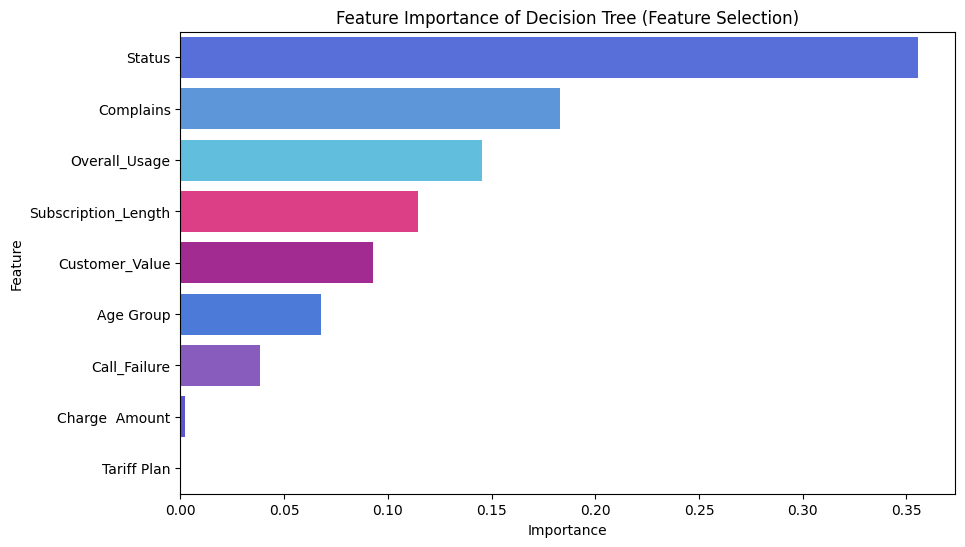

In [57]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4','#0E21A0']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_initial_dt, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of Decision Tree (Feature Selection)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Random Forest Feature Selection

In [58]:
# Create Feature Selection Dataset for Random Forest
feature_selection_rf = data
# Splitting the data into train and test
X = feature_selection_rf.drop('Churn', axis=1)
y= feature_selection_rf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Addressing Class Imbalance
feature_selection_random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

In [59]:
# Training the model
feature_selection_random_forest.fit(X_train, y_train)
# Predict the test set
y_pred_f_rf = feature_selection_random_forest.predict(X_test)
# Model Accuracy
y_train_pred = feature_selection_random_forest.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9913832199546485

In [60]:
# Testing Accuracy
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred_f_rf)
accuracy

0.9343915343915344

In [61]:
# Check Feature Importances
feature_importances_initial_rf = feature_selection_random_forest.feature_importances_
importance_of_initial_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_initial_rf})
importance_of_initial_rf = importance_of_initial_rf.sort_values(by='Importance', ascending=False)
importance_of_initial_rf

,Feature,Importance
8,Overall_Usage,0.224141
6,Status,0.187724
7,Customer_Value,0.172534
1,Complains,0.143813
2,Subscription_Length,0.131997
0,Call_Failure,0.058190
4,Age Group,0.049184
3,Charge Amount,0.029830
5,Tariff Plan,0.002587


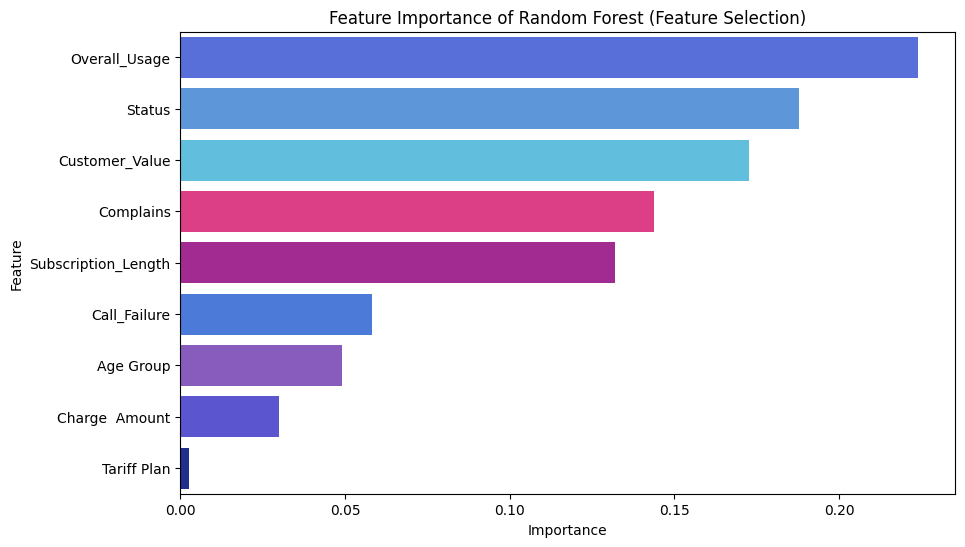

In [62]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4','#0E21A0']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_initial_rf, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of Random Forest (Feature Selection)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### XGBoost Feature Selection

In [63]:
# Create Feature Selection Dataset for XGBoost
feature_selection_xgb = data
# Splitting the data into train and test
X = feature_selection_xgb.drop('Churn', axis=1)
y= feature_selection_xgb['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Addressing Class Imbalance
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]), random_state=42, eval_metric='logloss')

In [64]:
# Training the model
xgb_classifier.fit(X_train, y_train)
# Predict the test set
y_pred_f_xgb = xgb_classifier.predict(X_test)
# Model Accuracy
y_train_pred = xgb_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9891156462585035

In [65]:
# Testing Accuracy
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred_f_xgb)
accuracy

0.928042328042328

In [66]:
# Check Feature Importances
feature_importances_initial_xgb = xgb_classifier.feature_importances_
importance_of_initial_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_initial_xgb})
importance_of_initial_xgb = importance_of_initial_xgb.sort_values(by='Importance', ascending=False)
importance_of_initial_xgb

,Feature,Importance
6,Status,0.580650
1,Complains,0.283619
8,Overall_Usage,0.030754
4,Age Group,0.027407
2,Subscription_Length,0.026207
0,Call_Failure,0.021283
7,Customer_Value,0.018680
3,Charge Amount,0.011398
5,Tariff Plan,0.000000


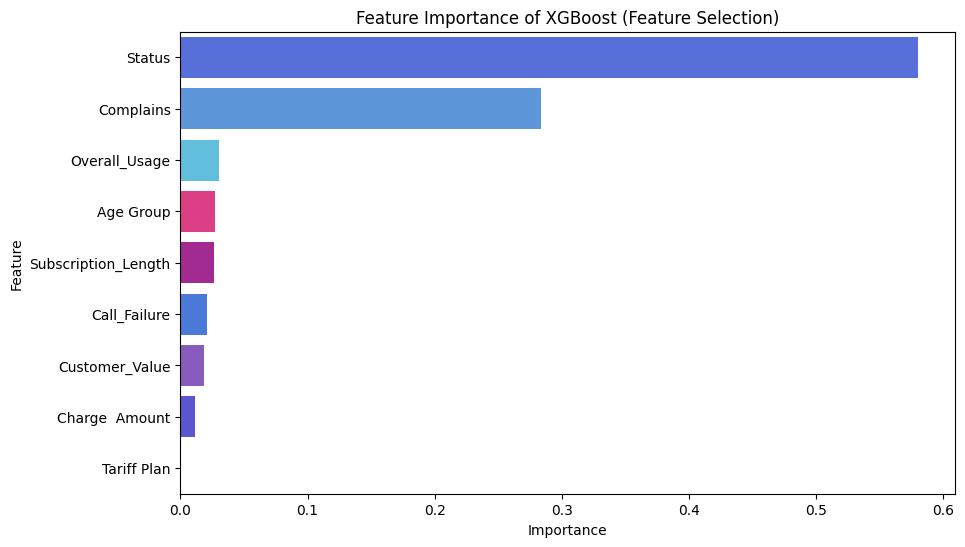

In [67]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4','#0E21A0']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_initial_xgb, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of XGBoost (Feature Selection)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

According to the feature importance expressed by all three models, it can conclusively be stated that the Tariff Plan feature has low importance compared to others and therefore can be removed from classification analysis.

## Create a dataframe for classification after feature selection

In [68]:
# Remove Tariff Plan as it has no importance and create a new dataframe for classification purpose
classification_data = data.copy()
classification_data.drop(columns=['Tariff Plan'], inplace=True)

## Decision Tree Classification

In [69]:
# Create Feature Selection Dataset for Decision Tree
dt_data = classification_data
# Splitting the data into train and test
X = dt_data.drop('Churn', axis=1)
y= dt_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Addressing Class Imbalance
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [71]:
# Training the model
decision_tree.fit(X_train, y_train)
# Predict the test set
y_pred_dt = decision_tree.predict(X_test)
# Model Accuracy
y_train_pred = decision_tree.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9900226757369615

In [72]:
# Testing Accuracy
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.9216931216931217

In [73]:
# Use cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(decision_tree, X, y, cv=kf, scoring='accuracy')
print("Average Cross-Validation Accuracy: ", cv_score.mean())

Average Cross-Validation Accuracy:  0.9333333333333333


In [74]:
# Check Feature Importances
feature_importances_dt = decision_tree.feature_importances_
importance_of_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_dt})
importance_of_dt = importance_of_dt.sort_values(by='Importance', ascending=False)
importance_of_dt

,Feature,Importance
5,Status,0.355844
1,Complains,0.183199
6,Customer_Value,0.119520
7,Overall_Usage,0.115695
2,Subscription_Length,0.113926
4,Age Group,0.066138
0,Call_Failure,0.042925
3,Charge Amount,0.002753


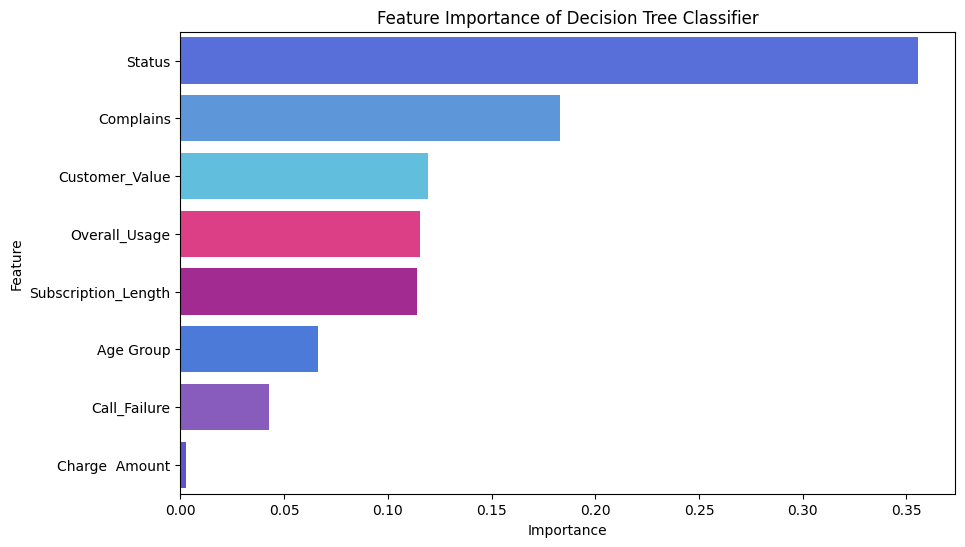

In [75]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_dt, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [76]:
# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       783
           1       0.77      0.78      0.77       162

    accuracy                           0.92       945
   macro avg       0.86      0.87      0.86       945
weighted avg       0.92      0.92      0.92       945



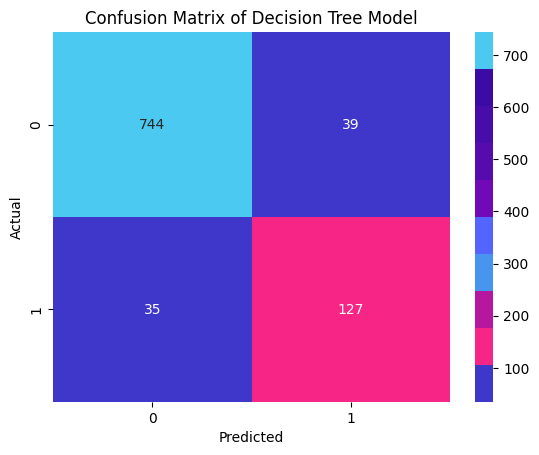

In [77]:
# Confusion Matrix of Decision Tree
colors = ['#3F37C9', '#F72585', '#B5179E', '#4895EF', '#5465FF', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#4CC9F0']
cmap = mcolors.ListedColormap(colors)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=cmap)
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
# ROC Curve
roc_auc_curve = roc_auc_score(y_test, y_pred_dt)
print(f"ROC AUC Score: {roc_auc_curve:.2f}")

ROC AUC Score: 0.87


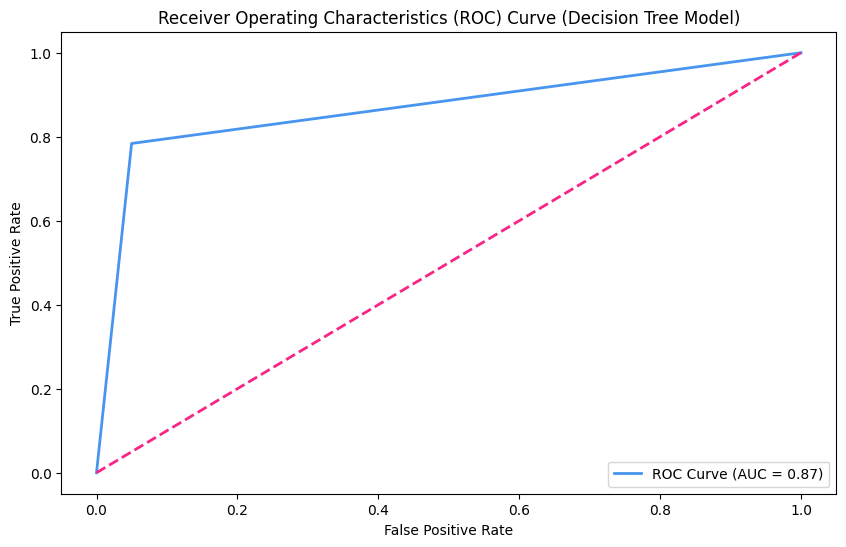

In [79]:
# Plot ROC curve for initial dt model
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#4895EF', lw=2, label=f'ROC Curve (AUC = {roc_auc_curve:.2f})')
plt.plot([0,1],[0,1], color='#F72585', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve (Decision Tree Model)')
plt.legend(loc='lower right')
plt.show()

## Random Forest Model Classification

In [80]:
# Create Feature Selection Dataset for Random Forest
rf_data = classification_data
# Splitting the data into train and test
X = rf_data.drop('Churn', axis=1)
y= rf_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# Addressing Class Imbalance
rf_tree = RandomForestClassifier(class_weight='balanced', random_state=42)

In [82]:
# Training the model
rf_tree.fit(X_train, y_train)
# Predict the test set
y_pred_rf = rf_tree.predict(X_test)
# Model Accuracy
y_train_pred = rf_tree.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9913832199546485

In [83]:
# Testing Accuracy
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.9312169312169312

In [84]:
# Parameters used in Modeling
params = rf_tree.get_params()
for param, value in params.items():
  print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [85]:
# Use cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(rf_tree, X, y, cv=kf, scoring='accuracy')
print("Average Cross-Validation Accuracy: ", cv_score.mean())

Average Cross-Validation Accuracy:  0.9425396825396826


In [86]:
# ROC Curve
roc_auc_curve = roc_auc_score(y_test, y_pred_rf)
print(f"ROC AUC Score: {roc_auc_curve:.2f}")

ROC AUC Score: 0.85


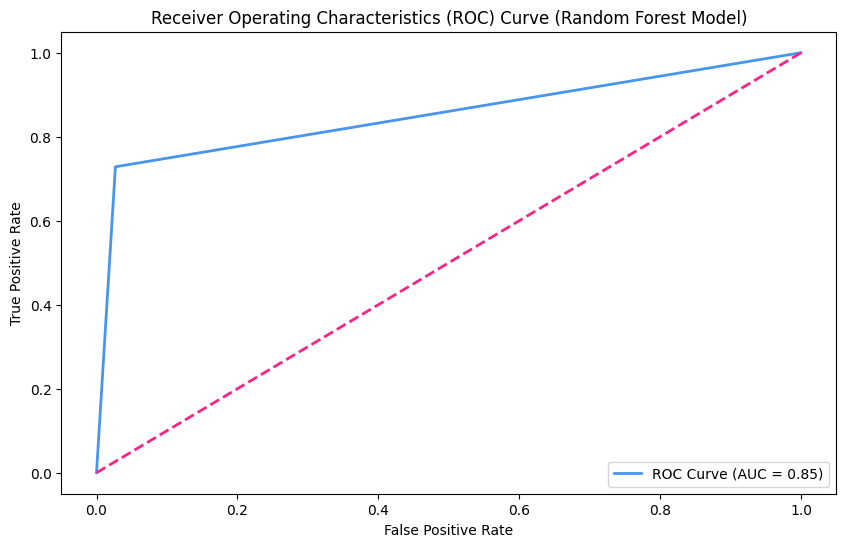

In [87]:
# Plot ROC curve for initial rf model
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#4895EF', lw=2, label=f'ROC Curve (AUC = {roc_auc_curve:.2f})')
plt.plot([0,1],[0,1], color='#F72585', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve (Random Forest Model)')
plt.legend(loc='lower right')
plt.show()

In [88]:
# Check Feature Importances
feature_importances_rf = rf_tree.feature_importances_
importance_of_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importance_of_rf = importance_of_rf.sort_values(by='Importance', ascending=False)
importance_of_rf

,Feature,Importance
7,Overall_Usage,0.212951
5,Status,0.201239
6,Customer_Value,0.159412
1,Complains,0.144417
2,Subscription_Length,0.129055
0,Call_Failure,0.062600
4,Age Group,0.048874
3,Charge Amount,0.041453


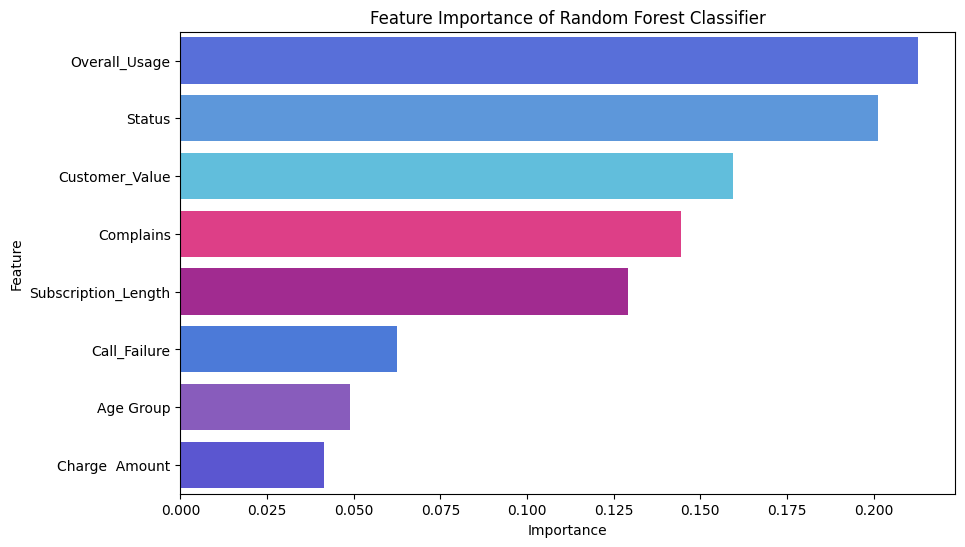

In [89]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_rf, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [90]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       783
           1       0.85      0.73      0.78       162

    accuracy                           0.93       945
   macro avg       0.90      0.85      0.87       945
weighted avg       0.93      0.93      0.93       945



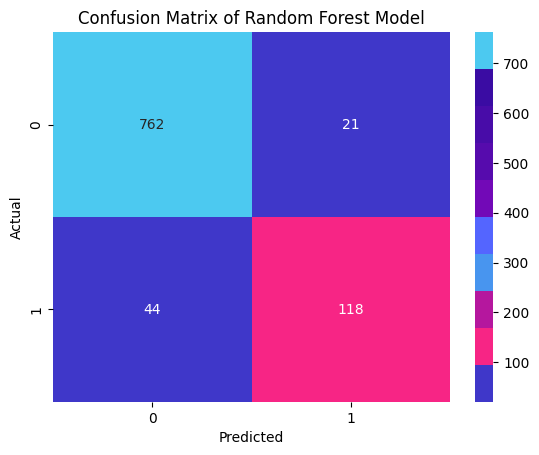

In [91]:
# Confusion Matrix of Random Forest
colors = ['#3F37C9', '#F72585', '#B5179E', '#4895EF', '#5465FF', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#4CC9F0']
cmap = mcolors.ListedColormap(colors)

conf_matrix_dt = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=cmap)
plt.title('Confusion Matrix of Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost Classifier

In [92]:
# Create Feature Selection Dataset for XGBoost
xgb_data = classification_data
# Splitting the data into train and test
X = xgb_data.drop('Churn', axis=1)
y= xgb_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
# Addressing Class Imbalance
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]), random_state=42, eval_metric='logloss')

In [94]:
# Training the model
xgb_classifier.fit(X_train, y_train)
# Predict the test set
y_pred_xgb = xgb_classifier.predict(X_test)
# Model Accuracy
y_train_pred = xgb_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9891156462585035

In [95]:
# Testing Accuracy
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.928042328042328

In [96]:
# Use cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(xgb_classifier, X, y, cv=kf, scoring='accuracy')
print("Average Cross-Validation Accuracy: ", cv_score.mean())

Average Cross-Validation Accuracy:  0.9466666666666667


In [97]:
# ROC Curve
roc_auc_curve = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC AUC Score: {roc_auc_curve:.2f}")

ROC AUC Score: 0.88


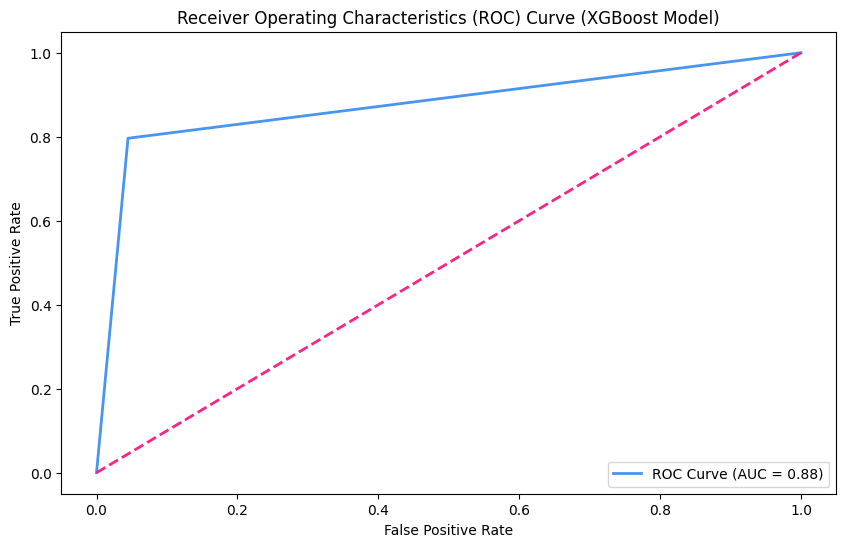

In [98]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#4895EF', lw=2, label=f'ROC Curve (AUC = {roc_auc_curve:.2f})')
plt.plot([0,1],[0,1], color='#F72585', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve (XGBoost Model)')
plt.legend(loc='lower right')
plt.show()

In [99]:
# Classification Report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       783
           1       0.79      0.80      0.79       162

    accuracy                           0.93       945
   macro avg       0.87      0.88      0.87       945
weighted avg       0.93      0.93      0.93       945



In [100]:
# Check Feature Importances
feature_importances_xgb = xgb_classifier.feature_importances_
importance_of_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})
importance_of_xgb = importance_of_xgb.sort_values(by='Importance', ascending=False)
importance_of_xgb

,Feature,Importance
5,Status,0.580650
1,Complains,0.283619
7,Overall_Usage,0.030754
4,Age Group,0.027407
2,Subscription_Length,0.026207
0,Call_Failure,0.021283
6,Customer_Value,0.018680
3,Charge Amount,0.011398


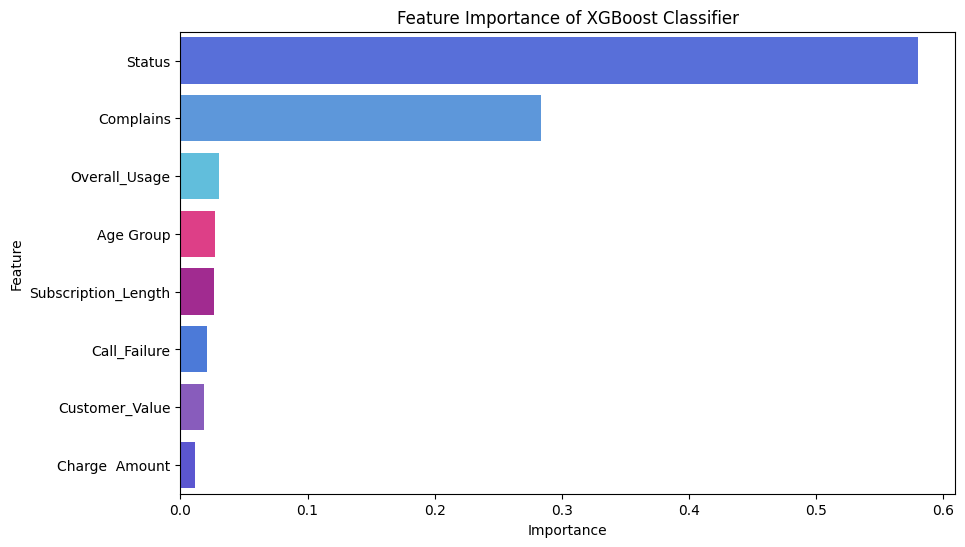

In [101]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_xgb, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

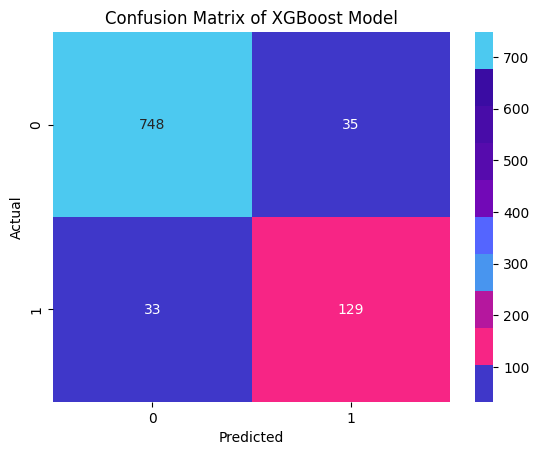

In [102]:
# Confusion Matrix of XGBoost
colors = ['#3F37C9', '#F72585', '#B5179E', '#4895EF', '#5465FF', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#4CC9F0']
cmap = mcolors.ListedColormap(colors)

conf_matrix_dt = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=cmap)
plt.title('Confusion Matrix of XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter Tuning for Classification - Random Forest Model

The Random Forest Model displayed the highest accuracy rate. Therefore, it will be tuned further using hyperparameter tuning

In [103]:
# Pre-Pruning by setting parameters for gridsearch
parameters = {
    'n_estimators':[150,200,250],
    'min_samples_leaf':[2,3,4],
    'min_samples_split':[3,4,5]
}

# GridSearchCV
grid_search_cv = GridSearchCV(estimator=rf_tree, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)
best_params_rf = grid_search_cv.best_params_
best_model_rf = grid_search_cv.best_estimator_
print(f"Best Parameters: {best_params_rf}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [104]:
# Making Predictions with new parameters
best_y_pred = best_model_rf.predict(X_test)
best_y_pred_positive_class_proba = best_model_rf.predict_proba(X_test)[:,1]

In [105]:
# Check accuracy of the Tuned model
accuracy_Tuned_model = accuracy_score(y_test, best_y_pred)
print(f"Accuracy: {accuracy_Tuned_model:.4f}")

Accuracy: 0.9302


In [106]:
# Check the Classification Report of the Tuned model
classification_tuned_rf_model = classification_report(y_test, best_y_pred)
print(classification_tuned_rf_model)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       783
           1       0.80      0.79      0.80       162

    accuracy                           0.93       945
   macro avg       0.88      0.87      0.88       945
weighted avg       0.93      0.93      0.93       945



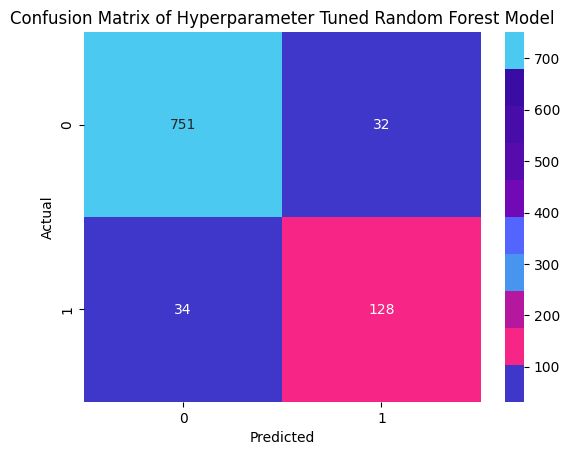

In [107]:
# Check Confusion Matrix of the Tuned model
colors = ['#3F37C9', '#F72585', '#B5179E', '#4895EF', '#5465FF', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#4CC9F0']
cmap = mcolors.ListedColormap(colors)

conf_matrix_tuned_rf_model = confusion_matrix(y_test, best_y_pred)
sns.heatmap(conf_matrix_tuned_rf_model, annot=True, fmt='d', cmap=cmap)
plt.title('Confusion Matrix of Hyperparameter Tuned Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [108]:
# ROC Curve
roc_auc_curve = roc_auc_score(y_test, best_y_pred)
print(f"ROC AUC Score: {roc_auc_curve:.2f}")

ROC AUC Score: 0.87


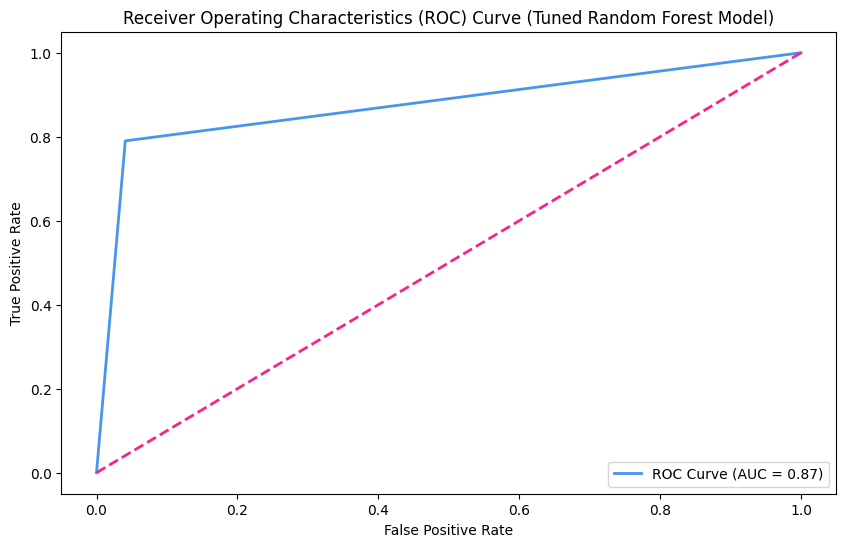

In [109]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, best_y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#4895EF', lw=2, label=f'ROC Curve (AUC = {roc_auc_curve:.2f})')
plt.plot([0,1],[0,1], color='#F72585', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve (Tuned Random Forest Model)')
plt.legend(loc='lower right')
plt.show()

In [110]:
# Parameters used in Modeling
params = best_model_rf.get_params()
for param, value in params.items():
  print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 5
min_weight_fraction_leaf: 0.0
n_estimators: 150
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [111]:
# Check Feature Importances
feature_importances_tuned_rf = best_model_rf.feature_importances_
importance_of_tuned_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_tuned_rf})
importance_of_tuned_rf = importance_of_tuned_rf.sort_values(by='Importance', ascending=False)
importance_of_tuned_rf

,Feature,Importance
7,Overall_Usage,0.218449
5,Status,0.214393
6,Customer_Value,0.154341
1,Complains,0.153430
2,Subscription_Length,0.121698
0,Call_Failure,0.055332
4,Age Group,0.046173
3,Charge Amount,0.036185


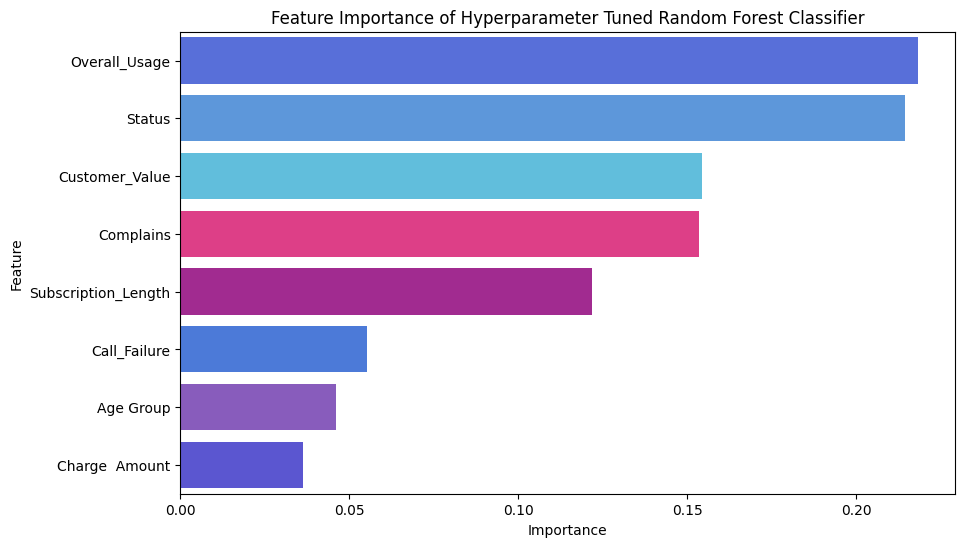

In [112]:
# Plotting the Feature Importance
colors = ['#4361EE', '#4895EF', '#4CC9F0', '#F72585', '#B5179E', '#3572EF','#874CCC','#4942E4']
palette=colors
plt.figure(figsize=(10,6))
sns.barplot(data=importance_of_tuned_rf, x='Importance',y='Feature', hue='Feature', dodge=False, palette=palette)
plt.title('Feature Importance of Hyperparameter Tuned Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Clustering

In [113]:
# Create a copy of the original data (After scaling & transformation but prior to classification) for clustering analysis
clustering_data = data
clustering_data

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage
0,0.349430,0,0.657588,-0.619962,0.194941,1,1,-0.394977,0,0.104651
1,-1.478558,0,0.840290,-0.619962,-0.925616,1,2,-1.038302,0,-1.374989
2,0.565195,0,0.481747,-0.619962,0.194941,1,1,1.828589,0,0.089674
3,0.565195,0,0.657588,-0.619962,-2.046172,1,1,-0.268132,0,0.026577
4,-0.359148,0,0.657588,-0.619962,-2.046172,1,1,-0.570410,0,-0.410515
...,...,...,...,...,...,...,...,...,...,...
3145,1.483122,0,-1.611403,0.695109,-0.925616,2,1,0.738142,0,0.837796
3146,1.186170,0,-1.732379,0.037573,2.436055,1,1,-0.208925,0,1.243101
3147,0.851679,0,-1.674333,2.010180,0.194941,1,1,-0.157557,0,-0.094495
3148,0.231369,0,-1.985386,0.695109,0.194941,1,1,1.265088,0,0.472383


In [114]:
# Using one hot encoding
categorical_col = ['Complains','Tariff Plan','Status']
encoded_data = pd.get_dummies(clustering_data, columns=categorical_col)
encoded_data.head()

,Call_Failure,Subscription_Length,Charge Amount,Age Group,Customer_Value,Churn,Overall_Usage,Complains_0,Complains_1,Tariff Plan_1,Tariff Plan_2,Status_1,Status_2
0,0.349430,0.657588,-0.619962,0.194941,-0.394977,0,0.104651,True,False,True,False,True,False
1,-1.478558,0.840290,-0.619962,-0.925616,-1.038302,0,-1.374989,True,False,True,False,False,True
2,0.565195,0.481747,-0.619962,0.194941,1.828589,0,0.089674,True,False,True,False,True,False
3,0.565195,0.657588,-0.619962,-2.046172,-0.268132,0,0.026577,True,False,True,False,True,False
4,-0.359148,0.657588,-0.619962,-2.046172,-0.570410,0,-0.410515,True,False,True,False,True,False


# Conducting PCA Analysis

In [115]:
pca_data=encoded_data

In [116]:
# Applying PCA
pca = PCA()
pca.fit(pca_data)

PCA()

In [117]:
# Eigenvalues (Variance Explained)
eigenvalues = pca.explained_variance_

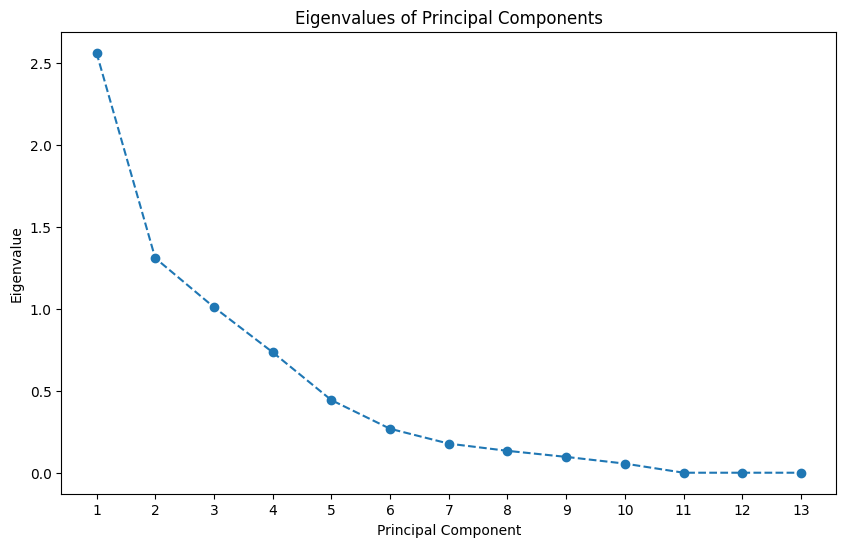

In [118]:
_# Plotting Eigenvalues
plt.figure(figsize=(10,6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues,marker='o',linestyle='--')
plt.title('Eigenvalues of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues)+1))
plt.show()

As can be seen from the diagram, we can estimate to have 02 Principal Components

In [119]:
# Applying PCA
pca=PCA(n_components =2)
features_pca = pca.fit_transform(pca_data)

In [120]:
pca_cols = [f'PC{i}' for i in range(features_pca.shape[1])]
data_w_pca = pd.DataFrame(features_pca, columns=pca_cols)
data_w_pca.head()

,PC0,PC1
0,-0.034654,0.190924
1,-2.289718,-0.275242
2,1.040240,-0.784847
3,-0.013338,-1.392261
4,-0.809198,-1.393401


## KMeans Clustering

In [121]:
k_means_data_01 = data_w_pca

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(k_means_data_01)
k_means_data_01['Cluster']=clusters
k_means_data_01

,PC0,PC1,Cluster
0,-0.034654,0.190924,2
1,-2.289718,-0.275242,1
2,1.040240,-0.784847,2
3,-0.013338,-1.392261,2
4,-0.809198,-1.393401,2
...,...,...,...
3145,1.642075,-0.904025,2
3146,1.030730,1.548295,0
3147,0.946728,0.893447,0
3148,1.003124,-0.568079,2


In [122]:
from sklearn.metrics import silhouette_score

In [123]:
s_avg = silhouette_score(data_w_pca, clusters)
print("Silhouette Score for KMeans: ",s_avg)

Silhouette Score for KMeans:  0.4665349200269972


In [124]:
from sklearn.metrics import silhouette_score

In [125]:
from sklearn.metrics import davies_bouldin_score

In [126]:
db_index = davies_bouldin_score(data_w_pca, clusters)
print("davies_bouldin_score Score for KMeans: ",db_index)

davies_bouldin_score Score for KMeans:  0.7868024136834381


## Heirarchical Clustering

In [127]:
h_data = data_w_pca

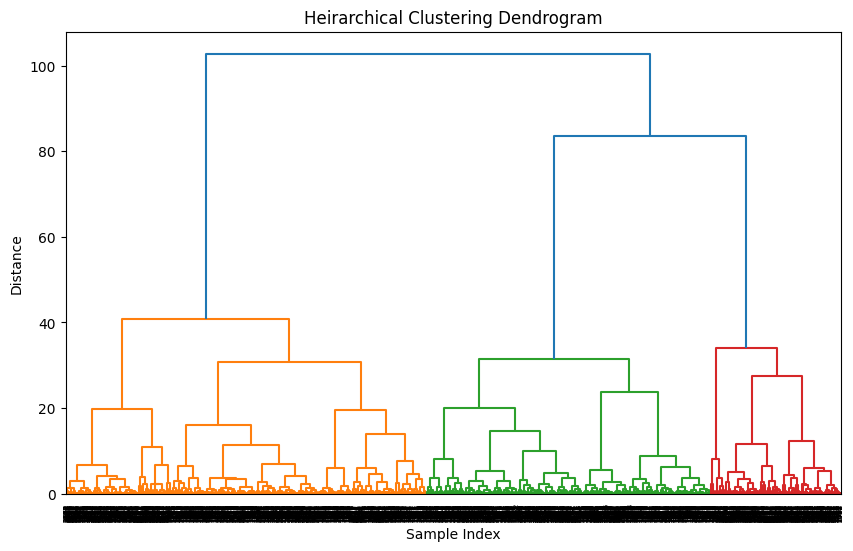

In [128]:
# Using Heirarchical Clustering
Z = linkage(h_data, method='ward')

#plotting Dendrogram
plt.figure(figsize=(10,6))
plt.title('Heirarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [129]:
num_clusters = 3
h_clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
h_data['Cluster']=h_clusters

In [130]:
s_avg = silhouette_score(data_w_pca, h_clusters)
print("Silhouette Score for Heirarchical: ",s_avg)

Silhouette Score for Heirarchical:  0.43197096737242713


In [131]:
db_index = davies_bouldin_score(data_w_pca, h_clusters)
print("davies_bouldin_score Score for KMeans: ",db_index)

davies_bouldin_score Score for KMeans:  0.8800660233327893


## DBScan Clustering

In [132]:
from sklearn.cluster import DBSCAN

In [133]:
db = data_w_pca

In [134]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(db)

db['Cluster']=clusters

In [135]:
num_clusters = len(set(clusters))-(1 if -1 in clusters else 0)
num_clusters

4

In [136]:
s_avg = silhouette_score(data_w_pca, clusters)
print("Silhouette Score for Heirarchical: ",s_avg)

Silhouette Score for Heirarchical:  0.4633223117386644


Based on the scores, it can be concluded that the K-Means clustering algorithm performs better in comparison to others.

# Hypertuning K Means Algorithm

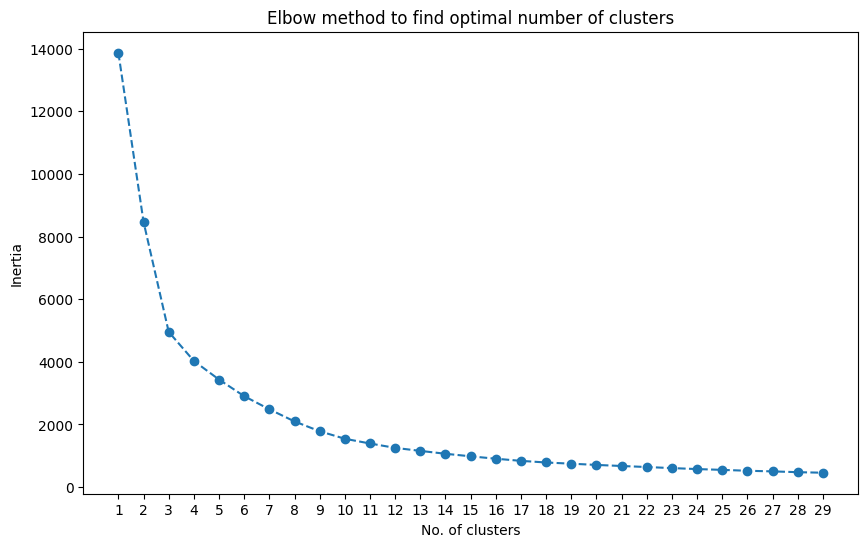

In [137]:
# Determining the optimal number of clusters for K-Means Clustering
k_means_data_02 = data_w_pca
inertia = []
k_range = range(1,30)
for k in k_range:
  kmeans= KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(k_means_data_02)
  inertia.append(kmeans.inertia_)

#plotting
plt.figure(figsize=(10,6))
plt.plot(k_range, inertia,marker='o',linestyle='--')
plt.title('Elbow method to find optimal number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [138]:
# Taking 5 as number of optimal cluster
optimal_k=5
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(k_means_data_02)
k_means_data_02['Cluster']=clusters
k_means_data_02

,PC0,PC1,Cluster
0,-0.034654,0.190924,1
1,-2.289718,-0.275242,3
2,1.040240,-0.784847,2
3,-0.013338,-1.392261,2
4,-0.809198,-1.393401,2
...,...,...,...
3145,1.642075,-0.904025,2
3146,1.030730,1.548295,0
3147,0.946728,0.893447,0
3148,1.003124,-0.568079,2


In [139]:
s_avg = silhouette_score(data_w_pca, clusters)
print("Silhouette Score for KMeans: ",s_avg)

Silhouette Score for KMeans:  0.5052410801117608


In [140]:
# Obtaining the final clustering
clustered_data = k_means_data_02

Now that we have our clusters we can plug it back to the original dataset

In [141]:
data.head()

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage
0,0.349430,0,0.657588,-0.619962,0.194941,1,1,-0.394977,0,0.104651
1,-1.478558,0,0.840290,-0.619962,-0.925616,1,2,-1.038302,0,-1.374989
2,0.565195,0,0.481747,-0.619962,0.194941,1,1,1.828589,0,0.089674
3,0.565195,0,0.657588,-0.619962,-2.046172,1,1,-0.268132,0,0.026577
4,-0.359148,0,0.657588,-0.619962,-2.046172,1,1,-0.570410,0,-0.410515


In [142]:
final_clustered_data = clustered_data

In [143]:
k_means_data_02

,PC0,PC1,Cluster
0,-0.034654,0.190924,1
1,-2.289718,-0.275242,3
2,1.040240,-0.784847,2
3,-0.013338,-1.392261,2
4,-0.809198,-1.393401,2
...,...,...,...
3145,1.642075,-0.904025,2
3146,1.030730,1.548295,0
3147,0.946728,0.893447,0
3148,1.003124,-0.568079,2


<ipython-input-144-4e017fe607d4>:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(data=k_means_data_02, x='PC0', y='PC1', hue='Cluster', palette=palette, s=100, alpha=0.7)


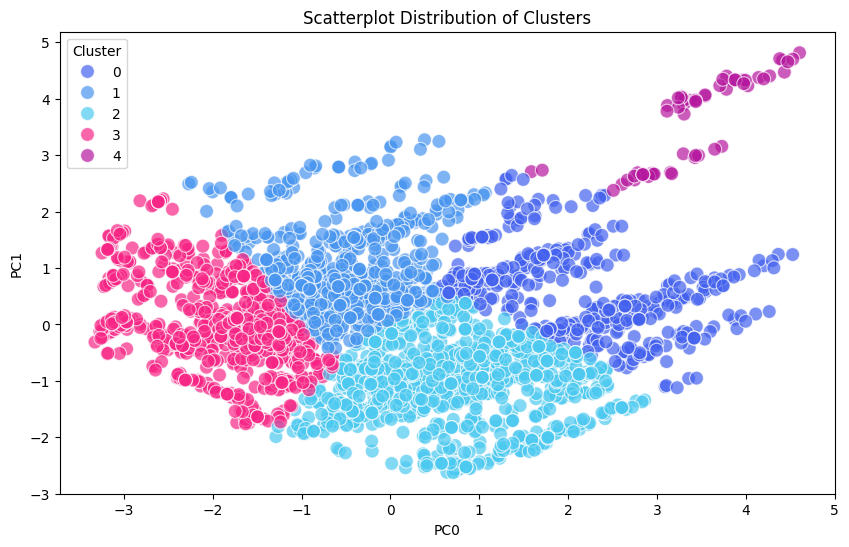

In [144]:
# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=k_means_data_02, x='PC0', y='PC1', hue='Cluster', palette=palette, s=100, alpha=0.7)
plt.title('Scatterplot Distribution of Clusters')
plt.show()

In [145]:
cluster_col = k_means_data_02['Cluster']
data.loc[:,'Cluster'] = cluster_col

<ipython-input-145-59012be11aa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Cluster'] = cluster_col


In [146]:
data.head()

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage,Cluster
0,0.349430,0,0.657588,-0.619962,0.194941,1,1,-0.394977,0,0.104651,1
1,-1.478558,0,0.840290,-0.619962,-0.925616,1,2,-1.038302,0,-1.374989,3
2,0.565195,0,0.481747,-0.619962,0.194941,1,1,1.828589,0,0.089674,2
3,0.565195,0,0.657588,-0.619962,-2.046172,1,1,-0.268132,0,0.026577,2
4,-0.359148,0,0.657588,-0.619962,-2.046172,1,1,-0.570410,0,-0.410515,2


In [147]:
# Take cluster means
cluster_means = data.groupby('Cluster').mean()
cluster_means

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage
Cluster,,,,,,,,,,
0,1.079964,0.039560,0.587677,1.169113,0.369797,1.147253,1.000000,0.623329,0.004396,1.076009
1,0.261388,0.169884,0.070117,-0.183298,0.646337,1.002574,1.425997,-0.565749,0.276705,-0.390789
2,-0.000300,0.018674,-0.053308,-0.175466,-0.553143,1.147526,1.000000,0.879031,0.040149,0.555208
3,-0.989728,0.082383,-0.367712,-0.597461,-0.248169,1.001267,1.571610,-0.968394,0.297845,-1.071476
4,1.495430,0.103448,0.436952,4.651659,2.030336,1.293103,1.000000,-0.369094,0.000000,1.117701


In [148]:
churn_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,Call_Failure,Seconds_of_Use,Frequency_of_Use,Frequency_of_SMS,Distinct_Called_Numbers,Customer_Value,Subscription_Length
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0,2.828427,66.105976,8.426150,2.236068,4.123106,14.058449,3071.552143
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0,0.000000,17.832555,2.236068,2.645751,2.000000,6.784910,3273.776898
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0,3.162278,49.527770,7.745967,18.947295,4.898979,39.198469,2876.921044
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0,3.162278,64.791975,8.124038,1.000000,5.916080,15.492579,3071.552143
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0,1.732051,48.918299,7.615773,1.414214,5.744563,12.074974,3071.552143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,721.980,0,4.582576,81.835200,12.124356,9.591663,6.633250,26.869686,560.098677
3146,17,0,17,1,9237,177,80,42,5,1,1,261.210,0,4.123106,96.109313,13.304135,8.944272,6.480741,16.161992,426.195081
3147,13,0,18,4,3157,51,38,21,3,1,1,280.320,0,3.605551,56.187187,7.141428,6.164414,4.582576,16.742760,490.443198
3148,7,0,11,2,4695,46,222,12,3,1,1,1077.640,0,2.645751,68.520070,6.782330,14.899664,3.464102,32.827428,146.151354


In [149]:
churn_with_cluster = churn_data

In [150]:
cluster_col = k_means_data_02['Cluster']
churn_with_cluster.loc[:,'Cluster'] = cluster_col

In [151]:
churn_with_cluster

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,...,Customer Value,Churn,Call_Failure,Seconds_of_Use,Frequency_of_Use,Frequency_of_SMS,Distinct_Called_Numbers,Customer_Value,Subscription_Length,Cluster
0,8,0,38,0,4370,71,5,17,3,1,...,197.640,0,2.828427,66.105976,8.426150,2.236068,4.123106,14.058449,3071.552143,1
1,0,0,39,0,318,5,7,4,2,1,...,46.035,0,0.000000,17.832555,2.236068,2.645751,2.000000,6.784910,3273.776898,3
2,10,0,37,0,2453,60,359,24,3,1,...,1536.520,0,3.162278,49.527770,7.745967,18.947295,4.898979,39.198469,2876.921044,2
3,10,0,38,0,4198,66,1,35,1,1,...,240.020,0,3.162278,64.791975,8.124038,1.000000,5.916080,15.492579,3071.552143,2
4,3,0,38,0,2393,58,2,33,1,1,...,145.805,0,1.732051,48.918299,7.615773,1.414214,5.744563,12.074974,3071.552143,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,...,721.980,0,4.582576,81.835200,12.124356,9.591663,6.633250,26.869686,560.098677,2
3146,17,0,17,1,9237,177,80,42,5,1,...,261.210,0,4.123106,96.109313,13.304135,8.944272,6.480741,16.161992,426.195081,0
3147,13,0,18,4,3157,51,38,21,3,1,...,280.320,0,3.605551,56.187187,7.141428,6.164414,4.582576,16.742760,490.443198,0
3148,7,0,11,2,4695,46,222,12,3,1,...,1077.640,0,2.645751,68.520070,6.782330,14.899664,3.464102,32.827428,146.151354,2


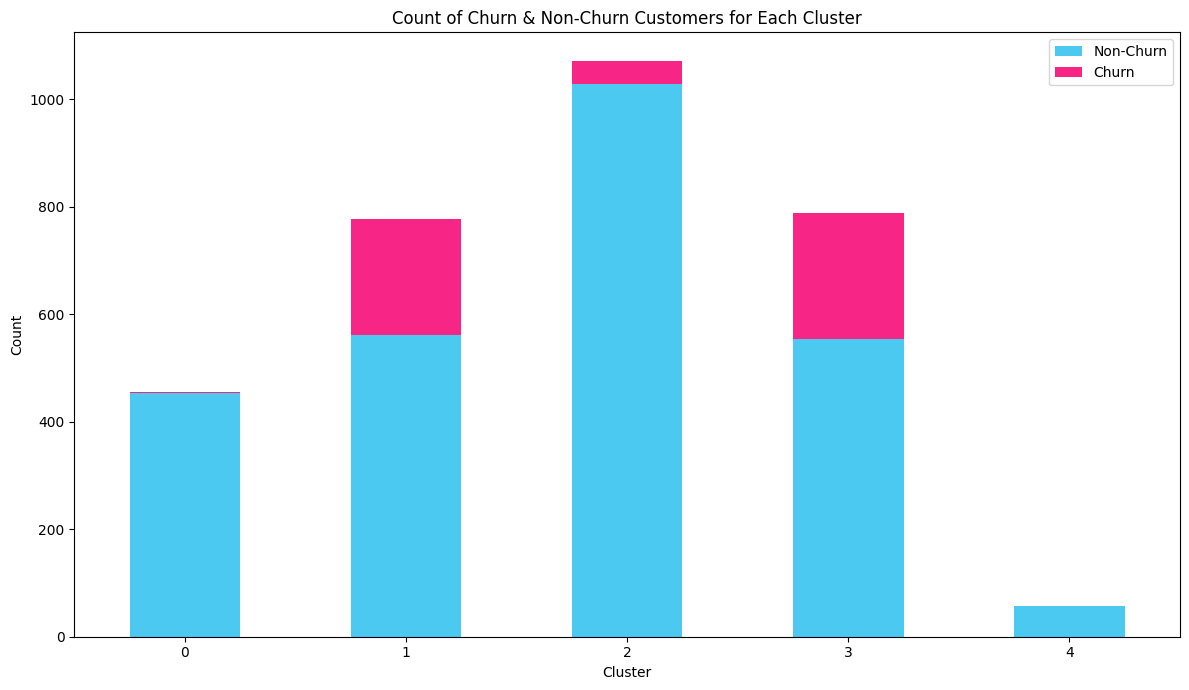

In [152]:
churn_count = churn_with_cluster.groupby(['Cluster', 'Churn']).size().unstack(fill_value=0)
churn_count.columns = ['Non-Churn', 'Churn']

fig, ax = plt.subplots(figsize=(12,7))
churn_count.plot(kind='bar', stacked=True, color=['#4CC9F0','#F72585'], ax=ax)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Count of Churn & Non-Churn Customers for Each Cluster')
ax.legend(['Non-Churn','Churn'], loc='upper right')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

# Regression

In [153]:
# Drop the Cluster variable
regression_data = data.drop(columns='Cluster')
regression_data

,Call_Failure,Complains,Subscription_Length,Charge Amount,Age Group,Tariff Plan,Status,Customer_Value,Churn,Overall_Usage
0,0.349430,0,0.657588,-0.619962,0.194941,1,1,-0.394977,0,0.104651
1,-1.478558,0,0.840290,-0.619962,-0.925616,1,2,-1.038302,0,-1.374989
2,0.565195,0,0.481747,-0.619962,0.194941,1,1,1.828589,0,0.089674
3,0.565195,0,0.657588,-0.619962,-2.046172,1,1,-0.268132,0,0.026577
4,-0.359148,0,0.657588,-0.619962,-2.046172,1,1,-0.570410,0,-0.410515
...,...,...,...,...,...,...,...,...,...,...
3145,1.483122,0,-1.611403,0.695109,-0.925616,2,1,0.738142,0,0.837796
3146,1.186170,0,-1.732379,0.037573,2.436055,1,1,-0.208925,0,1.243101
3147,0.851679,0,-1.674333,2.010180,0.194941,1,1,-0.157557,0,-0.094495
3148,0.231369,0,-1.985386,0.695109,0.194941,1,1,1.265088,0,0.472383


In [154]:
# Target Variable is Customer Value
X = regression_data.drop(columns='Customer_Value')
y= regression_data['Customer_Value']

In [155]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Linear Regression

In [167]:
# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
l_mae = mean_absolute_error(y_test, y_pred_linear)
l_mse = mean_squared_error(y_test, y_pred_linear)
l_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print(f"Mean Absolute Error: {l_mae:2f}")
print(f"Mean Squared Error: {l_mse:2f}")
print(f"R-Squared: {l_r2:2f}")


Linear Regression Model:
Mean Absolute Error: 0.450169
Mean Squared Error: 0.378789
R-Squared: 0.597499


## Random Forest Regression

In [168]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [169]:
# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r_mae = mean_absolute_error(y_test, y_pred_rf)
r_mse = mean_squared_error(y_test, y_pred_rf)
r_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model:")
print(f"Mean Absolute Error: {r_mae:2f}")
print(f"Mean Squared Error: {r_mse:2f}")
print(f"R-Squared: {r_r2:2f}")


Random Forest Regression Model:
Mean Absolute Error: 0.207285
Mean Squared Error: 0.183811
R-Squared: 0.804683


In [193]:
model_params = rf_model.get_params()
model_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Gradient Boosting Regressor

In [179]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators = 150, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [181]:
# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
g_mae = mean_absolute_error(y_test, y_pred_gb)
g_mse = mean_squared_error(y_test, y_pred_gb)
g_r2 = r2_score(y_test, y_pred_gb)

print("XGBRegressor Regression Model:")
print(f"Mean Absolute Error: {g_mae:2f}")
print(f"Mean Squared Error: {g_mse:2f}")
print(f"R-Squared: {g_r2:2f}")

XGBRegressor Regression Model:
Mean Absolute Error: 0.292880
Mean Squared Error: 0.236262
R-Squared: 0.748948


## XGBoost Regressor

In [170]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators = 150, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [171]:
# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
x_mae = mean_absolute_error(y_test, y_pred_xgb)
x_mse = mean_squared_error(y_test, y_pred_xgb)
x_r2 = r2_score(y_test, y_pred_xgb)

print("XGBRegressor Regression Model:")
print(f"Mean Absolute Error: {x_mae:2f}")
print(f"Mean Squared Error: {x_mse:2f}")
print(f"R-Squared: {x_r2:2f}")

XGBRegressor Regression Model:
Mean Absolute Error: 0.230644
Mean Squared Error: 0.190461
R-Squared: 0.797616


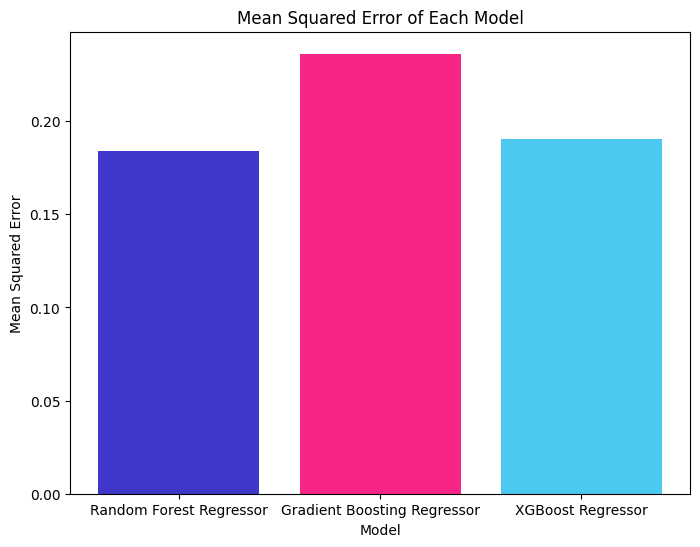

In [182]:
# Plotting the MSE
mse_values = {
    'Random Forest Regressor': r_mse,
    'Gradient Boosting Regressor': g_mse,
    'XGBoost Regressor': x_mse
}

#plotting
plt.figure(figsize=(8,6))
plt.bar(mse_values.keys(), mse_values.values(), color=['#3F37C9', '#F72585', '#4CC9F0'])
plt.title('Mean Squared Error of Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

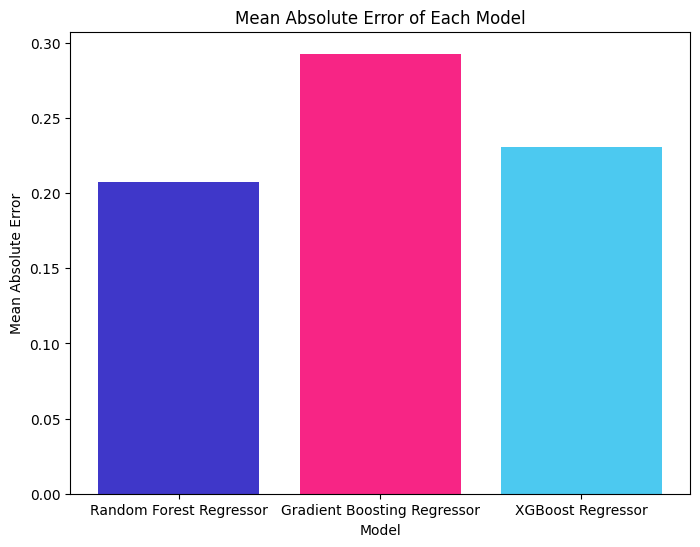

In [183]:
# Plotting the MAE
mae_values = {
    'Random Forest Regressor': r_mae,
    'Gradient Boosting Regressor': g_mae,
    'XGBoost Regressor': x_mae
}

#plotting
plt.figure(figsize=(8,6))
plt.bar(mae_values.keys(), mae_values.values(), color=['#3F37C9', '#F72585', '#4CC9F0'])
plt.title('Mean Absolute Error of Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.show()

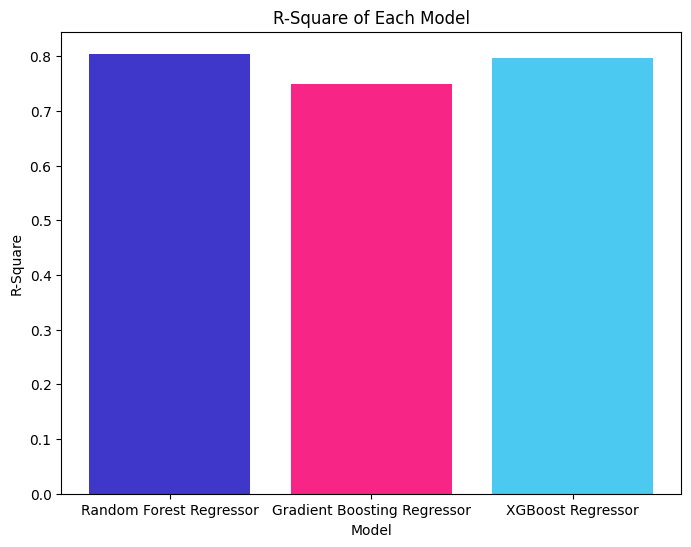

In [184]:
# Plotting the R-Square
r_values = {
    'Random Forest Regressor': r_r2,
    'Gradient Boosting Regressor': g_r2,
    'XGBoost Regressor': x_r2
}

#plotting
plt.figure(figsize=(8,6))
plt.bar(r_values.keys(), r_values.values(), color=['#3F37C9', '#F72585', '#4CC9F0'])
plt.title('R-Square of Each Model')
plt.xlabel('Model')
plt.ylabel('R-Square')
plt.show()

# Hyperparameter optimization of Random Forest Regressor

In [207]:
# Setting hyperparameter optimal
param_grid_rf = {
    'n_estimators': [150,180,200],
    'max_depth': [None, 10,20, 30],
    'min_samples_split': [10, 15, 20]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=150, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [150, 180, 200]},
             scoring='r2')

In [208]:
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R-Square for Random Forest: {grid_search_rf.best_score_:.2f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best R-Square for Random Forest: 0.81


In [209]:
# Get best model
best_rf_model = grid_search_rf.best_estimator_

In [210]:
y_pred_best_rf = best_rf_model.predict(X_test)

In [211]:
mae_rf_best = mean_absolute_error(y_test, y_pred_best_rf)
mse_rf_best = mean_squared_error(y_test, y_pred_best_rf)
r2_rf_best = r2_score(y_test, y_pred_best_rf)

In [212]:
print("Hyperparameter Optimized Random Forest Regression Model:")
print(f"Mean Absolute Error: {mae_rf_best:2f}")
print(f"Mean Squared Error: {mse_rf_best:2f}")
print(f"R-Squared: {r2_rf_best:2f}")

Hyperparameter Optimized Random Forest Regression Model:
Mean Absolute Error: 0.220395
Mean Squared Error: 0.184957
R-Squared: 0.803464


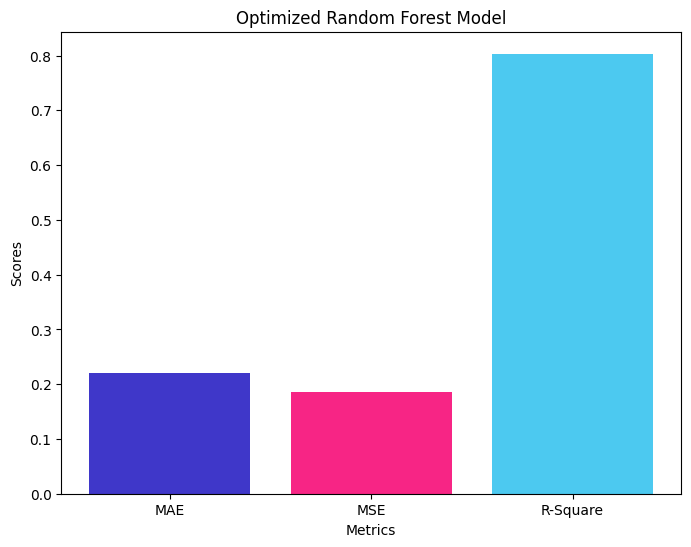

In [213]:
# Plotting the R-Square
r_values = {
    'MAE': mae_rf_best,
    'MSE': mse_rf_best,
    'R-Square': r2_rf_best
}

#plotting
plt.figure(figsize=(8,6))
plt.bar(r_values.keys(), r_values.values(), color=['#3F37C9', '#F72585', '#4CC9F0'])
plt.title('Optimized Random Forest Model')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()